In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install google_play_scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=712e3bf1c804e87afd7341289ce36c22ad1238ca7e48abd39e15feaaa111f371
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [5]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# import plotly.express as px
import csv
import numpy as np
from numpy import mean, std
import os 
import sys

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app
from google.colab import files

from datetime import date, time, timedelta, datetime as dt
import warnings
warnings.filterwarnings('ignore')

#NLP Packages
import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from spacy.tokenizer import Tokenizer

#from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_sequences


from collections import Counter
import itertools
from itertools import chain

import wordcloud
from wordcloud import WordCloud
from textblob import Word

#models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder


from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import gensim
from gensim.utils import simple_preprocess
from gensim.models import TfidfModel
from gensim.models import CoherenceModel
import gensim.corpora as corpora
import textblob
from textblob import TextBlob

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D


from sklearn.ensemble import StackingClassifier


#visualizations
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from IPython.display import display_html

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [9]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [10]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

### code to scrape data from playstore 
Venelin(2020)

In [ ]:
# fitnessapp_names= [
#     'com.fitbit.FitbitMobile',
#     'com.google.android.apps.fitness',
#     'com.runtastic.android',
#     'com.myfitnesspal.android',
#     'com.nike.ntc'
    
# ]

In [ ]:
# fitnessapp_reviews = []

# for ap in tqdm(fitnessapp_names):
#     for score in list(range(1, 6)):
#         for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
#             rvss, _ = reviews(
#                 ap,
#                 lang='en',
#                 country='us',
#                 sort=sort_order,
#                 count= 6000 if score == 3 else 3000,
#                 filter_score_with=score
#                 )
#             for r in rvss:
#                 r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
#                 r['appId'] = ap
#             fitnessapp_reviews.extend(rvss)

100%|██████████| 5/5 [04:05<00:00, 49.16s/it]


In [ ]:
# reviews_df = pd.DataFrame(fitnessapp_reviews)
# reviews_df.to_csv('new apps_reviews.csv', index=None, header=True)

In [60]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/new apps_reviews.csv')
df.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,d4e20271-9f85-42d7-a4e3-03409c6ca203,Bobbie Bowen,https://play-lh.googleusercontent.com/a-/AOh14...,06/21 Won't stay updated unless you leave the ...,1,22,3.62,2022-06-27 14:54:50,NaN,NaN,most_relevant,com.fitbit.FitbitMobile
1,609c2141-18ac-4e59-ad05-48e5cc8d43d0,Silas Mason,https://play-lh.googleusercontent.com/a/AATXAJ...,This app and my fitbit sense will not connect ...,1,111,3.60,2022-06-20 22:33:54,NaN,NaN,most_relevant,com.fitbit.FitbitMobile


# INITIAL DATA EXPLORATION

In [61]:
rows,columns = df.shape
print("The data has a total of {} rows and {} columns".format(rows,columns))

The data has a total of 159100 rows and 12 columns


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159100 entries, 0 to 159099
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              159100 non-null  object
 1   userName              159099 non-null  object
 2   userImage             159100 non-null  object
 3   content               159084 non-null  object
 4   score                 159100 non-null  int64 
 5   thumbsUpCount         159100 non-null  int64 
 6   reviewCreatedVersion  143648 non-null  object
 7   at                    159100 non-null  object
 8   replyContent          44443 non-null   object
 9   repliedAt             44443 non-null   object
 10  sortOrder             159100 non-null  object
 11  appId                 159100 non-null  object
dtypes: int64(2), object(10)
memory usage: 14.6+ MB


In [63]:
df['at'].min # views the dates of the reviews

<bound method NDFrame._add_numeric_operations.<locals>.min of 0         2022-06-27 14:54:50
1         2022-06-20 22:33:54
2         2022-06-23 06:11:46
3         2022-06-24 00:36:53
4         2022-06-26 16:32:18
                 ...         
159095    2020-11-22 18:33:40
159096    2020-11-22 13:55:28
159097    2020-11-20 10:49:00
159098    2020-11-19 17:02:18
159099    2020-11-18 04:58:52
Name: at, Length: 159100, dtype: object>

In [64]:
df['content'].isna().sum() #finds out the number of empty reviews

16

In [65]:
df['appId'].unique()

array(['com.fitbit.FitbitMobile', 'com.google.android.apps.fitness',
       'com.runtastic.android', 'com.myfitnesspal.android',
       'com.nike.ntc'], dtype=object)

In [66]:
df['appId'].value_counts()

com.fitbit.FitbitMobile            36000
com.google.android.apps.fitness    36000
com.myfitnesspal.android           36000
com.runtastic.android              25952
com.nike.ntc                       25148
Name: appId, dtype: int64

Text(0.5, 1.0, 'DISTRIBUTION OF USER RATINGS')

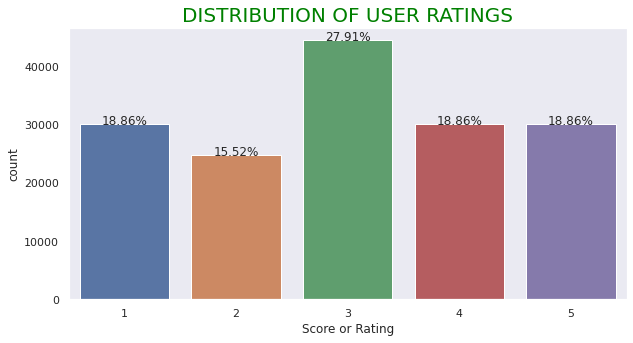

In [67]:
# visualisation of user ratings
sns.set(style="dark")
plt.figure(figsize=(10,5))
bikesplot=sns.countplot(x='score',data= df, palette= 'deep', )
for p in bikesplot.patches: 
    height = p.get_height() 
    bikesplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(df))*100)+'%',  
      ha="center")
plt.xlabel('Score or Rating')
plt.title('DISTRIBUTION OF USER RATINGS',fontsize=20,
          color="green")

In [68]:
#function to map the app ids to numbers for further use in analysis
def appid_no (appid):
    if appid == 'com.fitbit.FitbitMobile':
        return 1
    elif appid == 'com.google.android.apps.fitness':
        return 2
    elif appid == 'com.runtastic.android':
        return 3
    elif appid == 'com.myfitnesspal.android':
        return 4
    else:
        return 5

In [69]:
#function to map the app ids to numbers for further use in analysis
def appid_name (appid):
    if appid == 'com.fitbit.FitbitMobile':
        return 'Fitbit'
    elif appid == 'com.google.android.apps.fitness':
        return 'Google Fitness'
    elif appid == 'com.runtastic.android':
        return 'Runtastic'
    elif appid == 'com.myfitnesspal.android':
        return 'MyFitnessPal'
    else:
        return 'Nike'

# DATA CLEANING


From the observations above, the following data cleaning activity will take place:
1. Empty rows and duplicates will be removed as they do not add any value to the data
2. UserName and UserImage are expunged to protect the identity of the users as per GDPR standards.
   
4. Rows that do not have reviews but has rating will be removed as sentiments can only be gotten from reviews
5. The dataframe index will then be reset for proper data identification
6. Rename the content column to reviews
7. create two extra columns 'year' and month which will be used for further analysis

In [70]:
def clean_review_data(data): # function to clean the data as stated above
    df.drop_duplicates(keep= 'first', inplace = True)
    df.drop(df.index[df['content'].isna()], inplace=True)
    df.reset_index(drop=True, inplace = True)
    df.rename(columns = {'content': 'reviews'}, inplace = True)
    df['year'] = pd.to_datetime(df['at']).dt.year
    df['month'] = pd.to_datetime(df['at']).dt.month
    df['day'] = pd.to_datetime(df['at']).dt.day
    df.drop(df.columns[[0,1,2,10]], axis = 1, inplace = True)
    df['appIDno'] = df['appId'].apply(appid_no)
    df['appIDname'] = df['appId'].apply(appid_name)
    return df


In [71]:
clean_reviews = clean_review_data(df)

In [72]:
clean_reviews

,reviews,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appId,year,month,day,appIDno,appIDname
0,06/21 Won't stay updated unless you leave the ...,1,22,3.62,2022-06-27 14:54:50,NaN,NaN,com.fitbit.FitbitMobile,2022,6,27,1,Fitbit
1,This app and my fitbit sense will not connect ...,1,111,3.60,2022-06-20 22:33:54,NaN,NaN,com.fitbit.FitbitMobile,2022,6,20,1,Fitbit
2,Suddenly stopped syncing. I deleted device and...,1,28,3.60,2022-06-23 06:11:46,NaN,NaN,com.fitbit.FitbitMobile,2022,6,23,1,Fitbit
3,Update: App keeps asking me to review it in sp...,1,16,3.60,2022-06-24 00:36:53,NaN,NaN,com.fitbit.FitbitMobile,2022,6,24,1,Fitbit
4,I LOVED my Charge 5 when I got it. It helped s...,1,5,3.59.1,2022-06-26 16:32:18,NaN,NaN,com.fitbit.FitbitMobile,2022,6,26,1,Fitbit
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159079,Excellent apps,5,0,6.17.0,2020-11-22 18:33:40,NaN,NaN,com.nike.ntc,2020,11,22,5,Nike
159080,Love this app. The achievements are almost lik...,5,0,6.17.0,2020-11-22 13:55:28,NaN,NaN,com.nike.ntc,2020,11,22,5,Nike
159081,Super!! And its free in india,5,0,6.17.0,2020-11-20 10:49:00,NaN,NaN,com.nike.ntc,2020,11,20,5,Nike
159082,Great,5,0,6.17.0,2020-11-19 17:02:18,NaN,NaN,com.nike.ntc,2020,11,19,5,Nike


In [73]:
clean_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159084 entries, 0 to 159083
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviews               159084 non-null  object
 1   score                 159084 non-null  int64 
 2   thumbsUpCount         159084 non-null  int64 
 3   reviewCreatedVersion  143633 non-null  object
 4   at                    159084 non-null  object
 5   replyContent          44443 non-null   object
 6   repliedAt             44443 non-null   object
 7   appId                 159084 non-null  object
 8   year                  159084 non-null  int64 
 9   month                 159084 non-null  int64 
 10  day                   159084 non-null  int64 
 11  appIDno               159084 non-null  int64 
 12  appIDname             159084 non-null  object
dtypes: int64(6), object(7)
memory usage: 15.8+ MB


In [74]:
clean_reviews['score'].unique()

array([1, 2, 3, 4, 5])

In [75]:
clean_reviews['reviews'][0]

"06/21 Won't stay updated unless you leave the app running in the background. The more features get added, the less user friendly the app becomes. 06/22 A year later, still having same issues, still won't update stats unless left open in background. All those added features draining the battery of the watch and phone. Needs to get rid of excess garbage and fix what you have before adding more and more things that don't work."

### Analysis of the most influential review by app to decifer what rating the reviewer awarded and the  app company's response 

In [76]:
# filter the individual apps
a1111 = clean_reviews[clean_reviews['appIDno']== 1].reset_index()
b1111 = clean_reviews[clean_reviews['appIDno']== 2].reset_index()
c1111 = clean_reviews[clean_reviews['appIDno']== 3].reset_index()
d1111 = clean_reviews[clean_reviews['appIDno']== 4].reset_index()
e1111 = clean_reviews[clean_reviews['appIDno']== 5].reset_index()

#find the record with the highest thumbs up count
a222 = a1111.iloc[[a1111['thumbsUpCount'].idxmax()],:]
b222 = b1111.iloc[[b1111['thumbsUpCount'].idxmax()],:]
c222 = c1111.iloc[[c1111['thumbsUpCount'].idxmax()],:]
d222 = d1111.iloc[[d1111['thumbsUpCount'].idxmax()],:]
e222 = e1111.iloc[[e1111['thumbsUpCount'].idxmax()],:]
  
#append the output to a list
most_pop_rev= [a222,b222,c222,d222,e222] 

#concatenate the 5 dataframes
df_most_pop_rev = pd.concat(most_pop_rev)
df_most_pop_rev
popular_review = df_most_pop_rev.iloc[:,[1,2,3,4,6,13]]#select the important columns needed

popular_review.rename({'reviewCreatedVersion': 'App version'}, axis = 'columns', inplace= True)
popular_review['replyContent'].replace(np.nan, ' ', inplace = True) #replace nan values with space
popular_review['Responded?'] = popular_review['replyContent'].apply(lambda x: '0' if x == ' ' else '1') #create a new column to verify if review was responded to by the app company
popular_review

,reviews,score,thumbsUpCount,App version,replyContent,appIDname,Responded?
7062,"Unfortunately since the latest update, the wat...",2,1178,3.31.1,,Fitbit,0
12232,I've been using Fit for a while now. Love the ...,3,690,2.74.1.arm64-v8a.release,"HI Chaithanya, we’d suggest checking your Goog...",Google Fitness,1
38,Once you start using other applications or the...,1,828,12.13,"Hi, we are really sorry to hear that you have ...",Runtastic,1
374,I'm sure it would be great if it worked. i can...,1,560,19.2.1,,MyFitnessPal,0
42,"Reducing my rating from 5 stars to 2, and now ...",1,642,6.0.0,,Nike,0


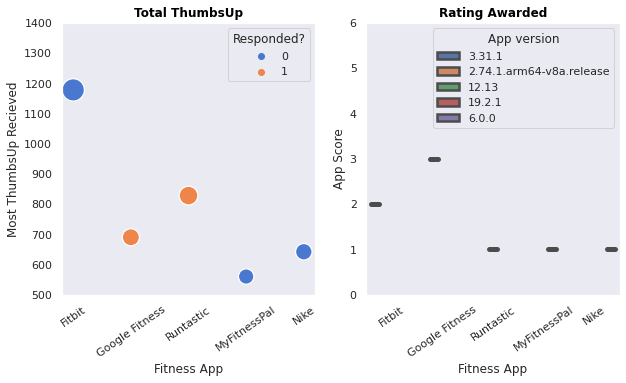

In [77]:
#visualise the output
font = {'family': 'Dejavu Sans',
        'color':  'black',
        'weight': 'semibold',
        'size': 12,
        }

plt.figure(figsize = (10,5),)
plt.subplot(1,2,1)

size = 500 * (popular_review.thumbsUpCount / popular_review.thumbsUpCount.max()) # DETERMINES THE SIZE OF THE CIRCLES OR BUBBLES

sns.scatterplot(x="appIDname", y="thumbsUpCount", hue="Responded?", s =size,
            alpha=1, palette="muted",
            data=popular_review,)
plt.xlabel('Fitness App')
plt.ylabel('Most ThumbsUp Recieved')
plt.title('Total ThumbsUp',fontdict = font)
plt.xticks(rotation = 35)
plt.ylim(500,1400)


plt.subplot(1,2,2)

sns.boxplot(x="appIDname", y="score", hue="App version",
            data=popular_review,fliersize=10,linewidth= 5,whis =3 )

plt.xlabel('Fitness App')
plt.ylabel('App Score')
plt.title('Rating Awarded',fontdict = font)
plt.xticks(rotation = 35)
plt.ylim(0,6)
plt.show()


In [78]:
popular_review.to_excel('most_popular_review.xlsx', encoding= 'utf-8-sig')#saving the output of the reviews to excel for further 
 
files.download('most_popular_review.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Determination of the most responsive fitness app provider

In [118]:
#filter record that have only reply content of the app providers
total_reps = clean_reviews[['appIDname','replyContent']]

total_reps

,appIDname,replyContent
0,Fitbit,NaN
1,Fitbit,NaN
2,Fitbit,NaN
3,Fitbit,NaN
4,Fitbit,NaN
...,...,...
159079,Nike,NaN
159080,Nike,NaN
159081,Nike,NaN
159082,Nike,NaN


In [119]:
total_replys= total_reps.dropna(axis = 0, inplace = False) # remove the nan rows


In [120]:
total_replys

,appIDname,replyContent
18,Fitbit,Hi there - We're here to help. Let's make your...
45,Fitbit,Hi Tory. We're sorry to hear this experience. ...
53,Fitbit,Hi Martha - Let's work on this. Please know th...
108,Fitbit,"Hi Laura - We appreciate you for trying a fix,..."
159,Fitbit,Hi Eduard - We appreciate all your feedback an...
...,...,...
146061,Nike,"Hello,\n \nThanks for your feedback. We believ..."
148396,Nike,"Hello,\n\nThanks for the feedback. In order fo..."
151482,Nike,"Hello,\n\nThanks for the feedback. In order fo..."
151489,Nike,"Hello,\n \nIn the latest version of NTC we've ..."


Text(0.5, 1.0, 'RESPONSE BY APP PROVIDER')

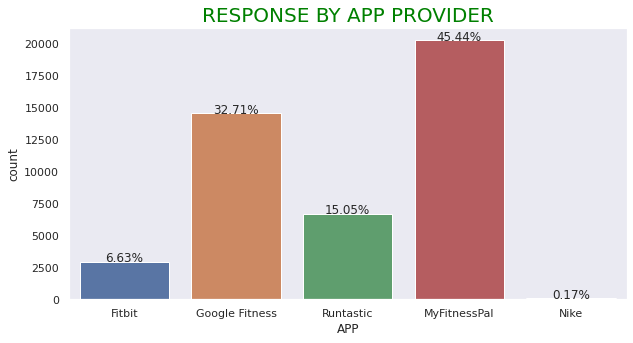

In [121]:
# visualise the total response by app provider
sns.set(style="dark")
plt.figure(figsize=(10,5))
replyplot=sns.countplot(x='appIDname',data= total_replys, palette= 'deep')
for p in replyplot.patches: 
    height = p.get_height() 
    replyplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(total_replys))*100)+'%',  
      ha="center")
plt.xlabel('APP')
plt.title('RESPONSE BY APP PROVIDER',fontsize=20,
          color="green")

### Analysis of Frequency of words per review

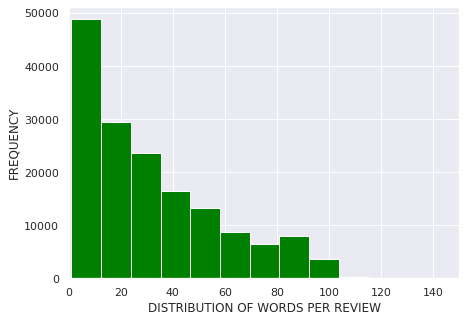

In [ ]:
plt.figure(figsize= (7,5))
sns.set_style('darkgrid')
w_p_review = clean_reviews.reviews.apply(lambda x: len (x.split(" ")))
w_p_review.hist(bins = 50, color = 'green', orientation = 'vertical')
plt.xlim(xmin =0 , xmax=150)
plt.xlabel ("DISTRIBUTION OF WORDS PER REVIEW")
plt.ylabel ("FREQUENCY")
plt.show()


from the above plot we are able to see that a greater number of reviews have less than 100 words each and the plot is skewed positively.

In [ ]:
w_p_review[0] #number of words in the first review

75

In [ ]:
print("The average words per review is ", round((w_p_review.mean()),2))

The average words per review is  31.88


In [ ]:
print("The skewness of the data is ", round((w_p_review.skew()),2) )

The skewness of the data is  1.55


In [ ]:
rating_percentage = (clean_reviews['score'].value_counts()/len(clean_reviews))*100
rating_percentage

3    27.908526
1    18.857962
4    18.857333
5    18.856076
2    15.520103
Name: score, dtype: float64

Text(0.5, 1.0, 'RATING MEASUREMENTS')

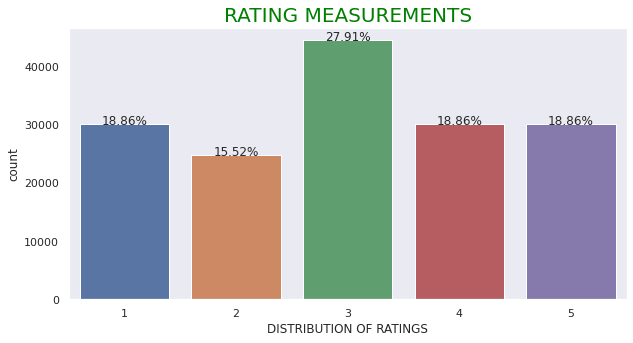

In [ ]:
sns.set(style="dark")
plt.figure(figsize=(10,5))
scoresplot=sns.countplot(x='score',data=clean_reviews, palette= 'deep')
for p in scoresplot.patches: 
    height = p.get_height() 
    scoresplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(clean_reviews))*100)+'%',  
      ha="center")
plt.xlabel('DISTRIBUTION OF RATINGS')
plt.title('RATING MEASUREMENTS',fontsize=20,
          color="green")

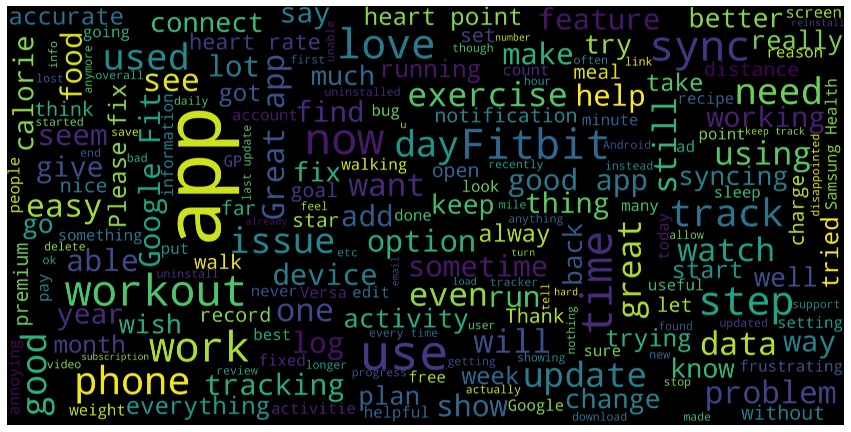

In [ ]:
cloud_of_words = " ".join(clean_reviews['reviews'])
wordclouds = WordCloud(max_font_size = 150,
                      background_color = "black",
                      scale = 10,
                      width = 1600,
                      height = 800,
                      ).generate(cloud_of_words)
plt.figure(figsize = (15,30))
plt.imshow(wordclouds, interpolation = "bilinear")
plt.axis("off")
plt.show()

# TEXT PRE-PROCESSING

# BUILD TEXT PRE-PROCESSING PIPELINE USING NLTK / SPACEY

The following steps will be taken inorder to get the text ready for the model
* Convert all words to lower case for uniformity
* Tokenise each word for the purpose of finding unique words within user reviews
* Remove all special characters
* Remove all stop words and words that will not improve the model's performance with words that give better insight
* Lemmatization of words to remove inflections and return only base form of the words

### NLTK METHOD

#### 1. Convert corpus to lowercase character

In [16]:
# convert words to lower case

clean_reviews['reviewsl']=clean_reviews['reviews'].str.lower()

In [17]:
clean_reviews['reviewsl'].head()

0    06/21 won't stay updated unless you leave the ...
1    this app and my fitbit sense will not connect ...
2    suddenly stopped syncing. i deleted device and...
3    update: app keeps asking me to review it in sp...
4    i loved my charge 5 when i got it. it helped s...
Name: reviewsl, dtype: object

#### 2. Removal of Special Characters

In [18]:
# next we find out the special characters in the corpus
sp_characters  = clean_reviews['reviewsl'].apply (lambda x: [i for i in list (x) if not i.isalnum() and i != " " ])

#then we uncouple the sp_character list of list in the corpus
uncoupled_list = [items for x in sp_characters for items in x]

# we then print out the special characters
set (uncoupled_list)

{'\t',
 '\n',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 '\xa0',
 '¡',
 '£',
 '¤',
 '¯',
 '°',
 '±',
 '´',
 '¶',
 '¿',
 '×',
 '÷',
 '̆',
 '̇',
 '̈',
 '̤',
 '̥',
 '̧',
 '͜',
 '͟',
 '͠',
 '͡',
 '،',
 '؟',
 '٪',
 'ँ',
 'ं',
 '़',
 'ा',
 'ि',
 'ी',
 'ु',
 'ू',
 'ृ',
 'ॅ',
 'े',
 'ै',
 'ॉ',
 'ो',
 'ौ',
 '्',
 '।',
 'ং',
 '়',
 'া',
 'ি',
 'ী',
 'ু',
 'ূ',
 'ে',
 'ো',
 '্',
 'ੀ',
 'ા',
 'િ',
 'ુ',
 'ે',
 'ો',
 '્',
 'ா',
 'ி',
 'ீ',
 'ு',
 'ூ',
 'ெ',
 'ே',
 'ை',
 '்',
 'ం',
 'ా',
 'ి',
 'ీ',
 'ు',
 'ూ',
 'ృ',
 'ె',
 'ే',
 'ై',
 'ో',
 '్',
 'ಂ',
 'ಾ',
 'ಿ',
 'ೀ',
 'ು',
 'ೆ',
 'ೇ',
 'ೋ',
 '್',
 'ി',
 'ു',
 'ോ',
 '്',
 'ั',
 'ิ',
 'ี',
 'ึ',
 'ื',
 'ุ',
 'ู',
 '็',
 '่',
 '้',
 '์',
 '༺',
 '༻',
 '\u200b',
 '\u200c',
 '\u200d',
 '‐',
 '–',
 '—',
 '‘',
 '’',
 '“',
 '”',
 '•',
 '…',
 '\u202b',
 '‼',
 '‿',
 '₩',
 '€',
 '₹',
 '₽',
 '⃣',
 '™',
 '→',
 '

In [19]:
#as we have identified the special characters above, the next step is to delete them as this will help reduce the number of unwanted tokens in the system.
# I have decided to leave a few special characters as they add tones to the corpus


# next we then remove the special characters
clean_reviews['reviewsl_sp'] = clean_reviews['reviewsl'].str.replace(r'[^A-Za-z0-9 ]+',' ')

In [20]:
clean_reviews['reviewsl_sp']

0         06 21 won t stay updated unless you leave the ...
1         this app and my fitbit sense will not connect ...
2         suddenly stopped syncing  i deleted device and...
3         update  app keeps asking me to review it in sp...
4         i loved my charge 5 when i got it  it helped s...
                                ...                        
159079                                       excellent apps
159080    love this app  the achievements are almost lik...
159081                         super  and its free in india
159082                                                great
159083    its sooo freakkn good it helped me recover fro...
Name: reviewsl_sp, Length: 159084, dtype: object

In [21]:
token_beforesp = [word_tokenize(each) for each in clean_reviews['reviews']]
tokens = [item for sublist in token_beforesp for item in sublist]
print("Number of unique tokens then: ",len(set(tokens)))

token_aftsp = [word_tokenize(each) for each in clean_reviews['reviewsl_sp']]
tokensaftsp = [item for sublist in token_aftsp for item in sublist]
print("Number of unique tokens now: ",len(set(tokensaftsp)))

Number of unique tokens then:  58132
Number of unique tokens now:  35002


: #### 3. Removal of Stopwords and high/low frequency words and Tokenization

In [22]:
#check for the available nltk stopwords languages
print(stopwords.fileids())

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [23]:
eng_stp_w = stopwords.words('english')
eng_stp_w

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
eng_stp_w.extend(['app', 'apps', 'fit', 'fitbit', 'google', 'nike', 'runtastic', 'myfitnesspal','go','get','please','see','how','say']) # we include more words to our stop word list

In [25]:
len(eng_stp_w)

193

In [26]:
#function to remove the stopwords in the review and tokenize the corpus

def rem_stp_words(stop_wrds, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_wrds]

In [27]:
clean_reviews['reviewsl_sp_nstp'] = clean_reviews['reviewsl_sp'].apply(lambda row: rem_stp_words(eng_stp_w, row))
clean_reviews[['reviewsl_sp','reviewsl_sp_nstp']]

,reviewsl_sp,reviewsl_sp_nstp
0,06 21 won t stay updated unless you leave the ...,"[06, 21, stay, updated, unless, leave, running..."
1,this app and my fitbit sense will not connect ...,"[sense, connect, totally, false, advertising, ..."
2,suddenly stopped syncing i deleted device and...,"[suddenly, stopped, syncing, deleted, device, ..."
3,update app keeps asking me to review it in sp...,"[update, keeps, asking, review, spite, already..."
4,i loved my charge 5 when i got it it helped s...,"[loved, charge, 5, got, helped, much, keep, tr..."
...,...,...
159079,excellent apps,[excellent]
159080,love this app the achievements are almost lik...,"[love, achievements, almost, like, game, beat,..."
159081,super and its free in india,"[super, free, india]"
159082,great,[great]


#### 4. Lemmatization

In [28]:
# fuction to view the parts of speech in the reviews
def p_tag (wds):
    return pos_tag(wds)


In [29]:
clean_reviews['reviewsl_sp_nstp_pt'] = clean_reviews['reviewsl_sp_nstp'].apply(lambda row: p_tag(row))
clean_reviews['reviewsl_sp_nstp_pt']

0         [(06, CD), (21, CD), (stay, NN), (updated, VBN...
1         [(sense, NN), (connect, NN), (totally, RB), (f...
2         [(suddenly, RB), (stopped, VBD), (syncing, VBG...
3         [(update, JJ), (keeps, NNS), (asking, VBG), (r...
4         [(loved, VBN), (charge, NN), (5, CD), (got, VB...
                                ...                        
159079                                    [(excellent, NN)]
159080    [(love, NN), (achievements, NNS), (almost, RB)...
159081               [(super, JJ), (free, JJ), (india, NN)]
159082                                        [(great, JJ)]
159083    [(sooo, NN), (freakkn, NN), (good, JJ), (helpe...
Name: reviewsl_sp_nstp_pt, Length: 159084, dtype: object

In [30]:
# next we then attempt to match the tags in the review with the wordnet dictionary of tags for uniformity 
# we create a function for tag matching
def nltk_tag_match(nltk_tag):
    
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [31]:
#the next function will apply the matched pos tags to the reviews

def p_tags(wdss):
    x = pos_tag(wdss)
    x_tagged = [(y[0], nltk_tag_match(y[1])) for y in x]
    return x_tagged

In [32]:
clean_reviews['reviews1_sp_nstp_ptm'] = clean_reviews['reviewsl_sp_nstp'].apply(lambda row: p_tags(row))
clean_reviews['reviews1_sp_nstp_ptm']

0         [(06, None), (21, None), (stay, n), (updated, ...
1         [(sense, n), (connect, n), (totally, r), (fals...
2         [(suddenly, r), (stopped, v), (syncing, v), (d...
3         [(update, a), (keeps, n), (asking, v), (review...
4         [(loved, v), (charge, n), (5, None), (got, v),...
                                ...                        
159079                                     [(excellent, n)]
159080    [(love, n), (achievements, n), (almost, r), (l...
159081                  [(super, a), (free, a), (india, n)]
159082                                         [(great, a)]
159083    [(sooo, n), (freakkn, n), (good, a), (helped, ...
Name: reviews1_sp_nstp_ptm, Length: 159084, dtype: object

In [33]:
lemm = WordNetLemmatizer() #assign the wordnet lemmatizer model to the variable lemm for use in the below function

def word_lemma(revss):

    lematized_sent = []
    for x in revss:
        res = []
        for word, tag in x:
            if tag is None:
                res.append(word)
            else:
                res.append(lemm.lemmatize(word, tag))
        lematized_sent.append((" ".join(res)))
    return lematized_sent

In [34]:
clean_reviews['reviewsl_sp_nstp_lemm'] = word_lemma(clean_reviews['reviews1_sp_nstp_ptm'])
clean_reviews['reviewsl_sp_nstp_lemm']

0         06 21 stay update unless leave running backgro...
1         sense connect totally false advertising sense ...
2         suddenly stop sync delete device add worked co...
3         update keep ask review spite already do still ...
4         love charge 5 get help much keep track fitness...
                                ...                        
159079                                            excellent
159080         love achievement almost like game beat point
159081                                     super free india
159082                                                great
159083    sooo freakkn good help recover asthma love tha...
Name: reviewsl_sp_nstp_lemm, Length: 159084, dtype: object

### ALTERNATIVELY USING SPACY

In [35]:
nlp = spacy.load('en_core_web_sm') # load the spacy dictionary for 

In [36]:
clean_reviews['spacy_reviews'] = clean_reviews['reviews'].apply(nlp)

In [37]:
nlp.Defaults.stop_words|={'app','apps' ,'fit', 'fitbit', 'google', 'nike', 'runtastic', 'myfitnesspal', 'go','get','please','see','how','say'}#adding more words to my spacy stop words

In [38]:
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'app',
 'apps',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'fit',
 'fitbit',
 'five',
 'for',
 'former',
 'formerly'

In [39]:
def word_lemma_spacy(revviews): #function to lemmatise using spacy 
    
    lemma_sentspacy = []
    for i in revviews:
        if not i.is_punct and not i.is_stop and not i.is_space:
            lemma_sentspacy.append(i.lemma_.lower())
    return ' '.join(lemma_sentspacy)

In [40]:
clean_reviews['finalspacy_reviews'] = clean_reviews['spacy_reviews'].apply(lambda row: word_lemma_spacy(row))

In [41]:
clean_reviews['finalspacy_reviews']

0         06/21 will stay update leave app run backgroun...
1         app fitbit sense connect totally false adverti...
2         suddenly stop sync delete device add work coup...
3         update app keep ask review spite having app ho...
4         love charge 5 get help track fitness goal coup...
                                ...                        
159079                                        excellent app
159080            love app achievement like game beat point
159081                                     super free india
159082                                                great
159083    sooo freakkn good help recover asthma!!! love ...
Name: finalspacy_reviews, Length: 159084, dtype: object

### Comparing NLTK and  Spacy output

In [ ]:
#x = clean_reviews['reviewsl_sp_nstp_lemm']
pd.options.display.max_colwidth
print(clean_reviews['reviewsl_sp_nstp_lemm'][:5]) #using NLTK lemmatizer
print(clean_reviews['reviewsl_sp_nstp_lemm'].tail(5))
print()
print()
print(clean_reviews['finalspacy_reviews'][:5]) #using SPACY
print(clean_reviews['finalspacy_reviews'].tail(5))

0    06 21 stay update unless leave running backgro...
1    sense connect totally false advertising sense ...
2    suddenly stop sync delete device add worked co...
3    update keep ask review spite already do still ...
4    love charge 5 get help much keep track fitness...
Name: reviewsl_sp_nstp_lemm, dtype: object
159079                                            excellent
159080         love achievement almost like game beat point
159081                                     super free india
159082                                                great
159083    sooo freakkn good help recover asthma love tha...
Name: reviewsl_sp_nstp_lemm, dtype: object


0    06/21 will stay update leave app run backgroun...
1    app fitbit sense connect totally false adverti...
2    suddenly stop sync delete device add work coup...
3    update app keep ask review spite having app ho...
4    love charge 5 get help track fitness goal coup...
Name: finalspacy_reviews, dtype: object
159079                

## WORD ASSOCIATIONS

In [ ]:
# we filter the apps
fitbit_l =clean_reviews[clean_reviews['appId']== 'com.fitbit.FitbitMobile']
googl =clean_reviews[clean_reviews['appId']== 'com.google.android.apps.fitness']
runl =clean_reviews[clean_reviews['appId']== 'com.runtastic.android']
fitnessl =clean_reviews[clean_reviews['appId']== 'com.myfitnesspal.android']
nikel =clean_reviews[clean_reviews['appId']== 'com.myfitnesspal.android']

In [ ]:
googl['score'].unique()

array([1, 2, 3, 4, 5])

Text(0.5, 1.0, 'FITBIT POSITIVE WORD CLOUD')

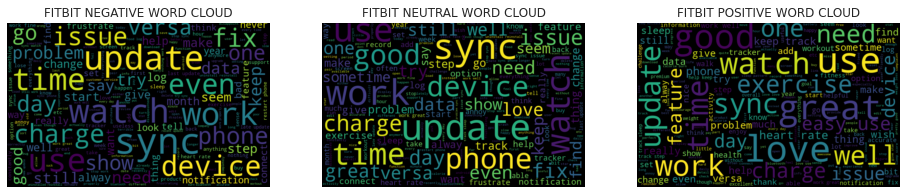

In [ ]:
x =' '.join([text for text in fitbit_l['reviewsl_sp_nstp_lemm'][fitbit_l['score'] <=2]]) # make one document of reviews with rating less or equal 2
y = ' '.join([text for text in fitbit_l['reviewsl_sp_nstp_lemm'][fitbit_l['score'] ==3]]) # make one document of reviews with rating equals 3
z = ' '.join([text for text in fitbit_l['reviewsl_sp_nstp_lemm'][fitbit_l['score'] >=4]]) # make one document of reviews with rating greater than or equal 4

# make subplots of word clouds for each of the above
plt.figure(figsize=(16, 13))

plt.subplot(1,3,1)
xcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(x)
plt.imshow(xcloud, interpolation="bilinear")
plt.axis('off')
plt.title('FITBIT NEGATIVE WORD CLOUD')


plt.subplot(1,3,2)
ycloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(y)
plt.imshow(ycloud, interpolation="bilinear")
plt.axis('off')
plt.title('FITBIT NEUTRAL WORD CLOUD')

plt.subplot(1,3,3)
zcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(z)
plt.imshow(zcloud, interpolation="bilinear")
plt.axis('off')
plt.title('FITBIT POSITIVE WORD CLOUD')


Text(0.5, 1.0, 'GOOGLEFIT POSITIVE WORD CLOUD')

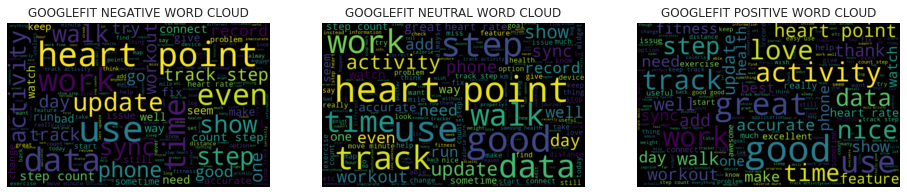

In [ ]:
a =' '.join([text for text in googl['reviewsl_sp_nstp_lemm'][googl['score'] <=2]])
b = ' '.join([text for text in googl['reviewsl_sp_nstp_lemm'][googl['score'] ==3]])
c = ' '.join([text for text in googl['reviewsl_sp_nstp_lemm'][googl['score'] >=4]])


plt.figure(figsize=(16, 13))

plt.subplot(1,3,1)
acloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(a)
plt.imshow(acloud, interpolation="bilinear")
plt.axis('off')
plt.title('GOOGLEFIT NEGATIVE WORD CLOUD')


plt.subplot(1,3,2)
bcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(b)
plt.imshow(bcloud, interpolation="bilinear")
plt.axis('off')
plt.title('GOOGLEFIT NEUTRAL WORD CLOUD')

plt.subplot(1,3,3)
ccloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(c)
plt.imshow(ccloud, interpolation="bilinear")
plt.axis('off')
plt.title('GOOGLEFIT POSITIVE WORD CLOUD')


Text(0.5, 1.0, 'RUNTASTIC POSITIVE WORD CLOUD')

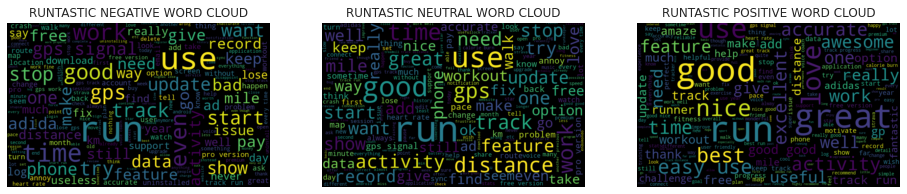

In [ ]:
d =' '.join([text for text in runl['reviewsl_sp_nstp_lemm'][runl['score'] <=2]])
e = ' '.join([text for text in runl['reviewsl_sp_nstp_lemm'][runl['score'] ==3]])
f = ' '.join([text for text in runl['reviewsl_sp_nstp_lemm'][runl['score'] >=4]])


plt.figure(figsize=(16, 13))

plt.subplot(1,3,1)
dcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(d)
plt.imshow(dcloud, interpolation="bilinear")
plt.axis('off')
plt.title('RUNTASTIC NEGATIVE WORD CLOUD')


plt.subplot(1,3,2)
ecloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(e)
plt.imshow(ecloud, interpolation="bilinear")
plt.axis('off')
plt.title('RUNTASTIC NEUTRAL WORD CLOUD')

plt.subplot(1,3,3)
fcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(f)
plt.imshow(fcloud, interpolation="bilinear")
plt.axis('off')
plt.title('RUNTASTIC POSITIVE WORD CLOUD')

Text(0.5, 1.0, 'FITNESSPAL POSITIVE WORD CLOUD')

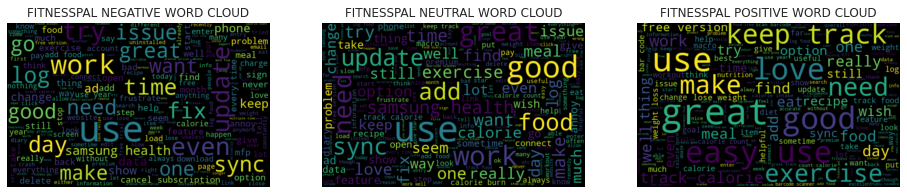

In [ ]:
g =' '.join([text for text in fitnessl['reviewsl_sp_nstp_lemm'][fitnessl['score'] <=2]])
h = ' '.join([text for text in fitnessl['reviewsl_sp_nstp_lemm'][fitnessl['score'] ==3]])
i = ' '.join([text for text in fitnessl['reviewsl_sp_nstp_lemm'][fitnessl['score'] >=4]])


plt.figure(figsize=(16, 13))

plt.subplot(1,3,1)
gcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(g)
plt.imshow(gcloud, interpolation="bilinear")
plt.axis('off')
plt.title('FITNESSPAL NEGATIVE WORD CLOUD')


plt.subplot(1,3,2)
hcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(h)
plt.imshow(hcloud, interpolation="bilinear")
plt.axis('off')
plt.title('FITNESSPAL NEUTRAL WORD CLOUD')

plt.subplot(1,3,3)
icloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(i)
plt.imshow(icloud, interpolation="bilinear")
plt.axis('off')
plt.title('FITNESSPAL POSITIVE WORD CLOUD')

Text(0.5, 1.0, 'NIKE POSITIVE WORD CLOUD')

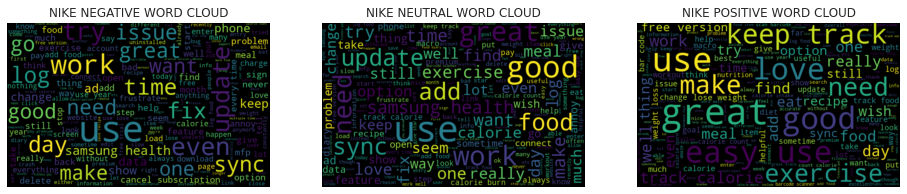

In [ ]:
j =' '.join([text for text in nikel['reviewsl_sp_nstp_lemm'][nikel['score'] <=2]])
k = ' '.join([text for text in nikel['reviewsl_sp_nstp_lemm'][nikel['score'] ==3]])
l = ' '.join([text for text in nikel['reviewsl_sp_nstp_lemm'][nikel['score'] >=4]])


plt.figure(figsize=(16, 13))

plt.subplot(1,3,1)
jcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(j)
plt.imshow(jcloud, interpolation="bilinear")
plt.axis('off')
plt.title('NIKE NEGATIVE WORD CLOUD')


plt.subplot(1,3,2)
kcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(k)
plt.imshow(kcloud, interpolation="bilinear")
plt.axis('off')
plt.title('NIKE NEUTRAL WORD CLOUD')

plt.subplot(1,3,3)
lcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(l)
plt.imshow(lcloud, interpolation="bilinear")
plt.axis('off')
plt.title('NIKE POSITIVE WORD CLOUD')

From the observations in my word cloud, negative and neutral sentiments have mostly the same type of word features
Therefore, I will only be performing sentiment analysis for the negative and positive reviews to reduce computational expense.

In [42]:
#shuffle the dataframe
clean_reviews1 = clean_reviews.sample(frac=1)
clean_reviews1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159084 entries, 141053 to 11817
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   reviews                159084 non-null  object
 1   score                  159084 non-null  int64 
 2   thumbsUpCount          159084 non-null  int64 
 3   reviewCreatedVersion   143633 non-null  object
 4   at                     159084 non-null  object
 5   replyContent           44443 non-null   object
 6   repliedAt              44443 non-null   object
 7   appId                  159084 non-null  object
 8   year                   159084 non-null  int64 
 9   month                  159084 non-null  int64 
 10  day                    159084 non-null  int64 
 11  appIDno                159084 non-null  int64 
 12  appIDname              159084 non-null  object
 13  reviewsl               159084 non-null  object
 14  reviewsl_sp            159084 non-null  object
 

In [43]:
clean_reviews1.drop(clean_reviews1[(clean_reviews1['score'] ==3)].index, inplace=True) # remove the neutral reviews because it seems to be a cross between positive and negative ratings

In [44]:
clean_reviews1.reset_index(drop=True, inplace = True)
len(clean_reviews1)

114686

In [45]:
print(len(clean_reviews1))
print()
print(len(clean_reviews))

114686

159084


Next is to assign the sentiment rating to the data

In [46]:
clean_reviews1['Sentiment Rating'] = np.where(clean_reviews1['score']<4,0,1) # rating less than 4 is assigned 0 else 1
clean_reviews1.head(5)

,reviews,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appId,year,month,...,appIDname,reviewsl,reviewsl_sp,reviewsl_sp_nstp,reviewsl_sp_nstp_pt,reviews1_sp_nstp_ptm,reviewsl_sp_nstp_lemm,spacy_reviews,finalspacy_reviews,Sentiment Rating
0,I loved the old version. Loved the workouts be...,2,0,5.0.1,2016-07-25 21:10:48,NaN,NaN,com.nike.ntc,2016,7,...,Nike,i loved the old version. loved the workouts be...,i loved the old version loved the workouts be...,"[loved, old, version, loved, workouts, could, ...","[(loved, VBN), (old, JJ), (version, NN), (love...","[(loved, v), (old, a), (version, n), (loved, v...",love old version love workout could grab equip...,"(I, loved, the, old, version, ., Loved, the, w...",love old version love workout grab equipment s...,0
1,I am facing issues using Google fit. Its not s...,1,0,NaN,2022-05-25 07:18:08,"Hey Akansha, we're sorry you've had this exper...",2022-05-25 09:43:47,com.google.android.apps.fitness,2022,5,...,Google Fitness,i am facing issues using google fit. its not s...,i am facing issues using google fit its not s...,"[facing, issues, using, syncing, healthify, bc...","[(facing, VBG), (issues, NNS), (using, VBG), (...","[(facing, v), (issues, n), (using, v), (syncin...",face issue use sync healthify bcs unable track...,"(I, am, facing, issues, using, Google, fit, .,...",face issue google fit sync healthify app bcs u...,0
2,Nice app,4,0,NaN,2022-01-24 17:38:43,NaN,NaN,com.myfitnesspal.android,2022,1,...,MyFitnessPal,nice app,nice app,[nice],"[(nice, JJ)]","[(nice, a)]",nice,"(Nice, app)",nice app,1
3,"I love the app, the download option is great, ...",4,2,6.21.1,2021-05-22 15:40:44,NaN,NaN,com.nike.ntc,2021,5,...,Nike,"i love the app, the download option is great, ...",i love the app the download option is great ...,"[love, download, option, great, downloaded, tr...","[(love, VB), (download, NN), (option, NN), (gr...","[(love, v), (download, n), (option, n), (great...",love download option great download training r...,"(I, love, the, app, ,, the, download, option, ...",love app download option great download traini...,1
4,"No resale value,not getting paired...worst app...",1,0,3.59.1,2022-05-26 17:12:59,NaN,NaN,com.fitbit.FitbitMobile,2022,5,...,Fitbit,"no resale value,not getting paired...worst app...",no resale value not getting paired worst app ...,"[resale, value, getting, paired, worst, service]","[(resale, NN), (value, NN), (getting, VBG), (p...","[(resale, n), (value, n), (getting, v), (paire...",resale value get pair bad service,"(No, resale, value, ,, not, getting, paired, ....",resale value getting pair bad app service,0


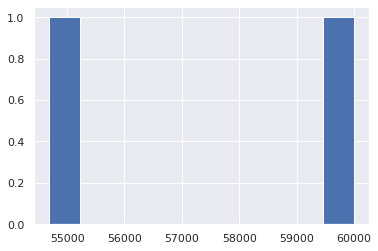

In [ ]:
clean_reviews1['Sentiment Rating'].value_counts().hist() #checkng for class imbalance

In [ ]:
clean_reviews1['Sentiment Rating'].value_counts() #class imbalance is negligile

1    59996
0    54690
Name: Sentiment Rating, dtype: int64

In [ ]:
#from the above, the imbalance in the dataset is negligible

#### USE GENSIM TO SPLIT THE SENTENCES INTO SMALLER SIZES AND THEN FIND COMMON WORD ASSOCIATIONS

In [ ]:
#### we introduce bigrams and trigrams into the pipeline to avoid bias which may come from looking at just individual words
#### bigrams and trigrams will help retain the context in which the words are used by retaining the structure of the reviews
#### analysing words together will give a better view of the context of the sentence in the reviews
#### this is used for common phrase detection

In [ ]:
#function to use gensim to split the clean reviews into minute chunks of words or tokens as this is a pre-requisite for gensim 

def rev_to_toks(revews):
    for revew in revews:
        yield(gensim.utils.simple_preprocess(str(revew), deacc=False))


data = clean_reviews1['reviewsl_sp_nstp_lemm'].tolist()
data_toks = list(rev_to_toks(data))
print('data_words[:1]', data_toks[:1])

data_words[:1] [['horrible', 'connection', 'issue', 'daily', 'uninstall', 'download', 'sometimes', 'reset', 'watch', 'come', 'good']]


In [ ]:
# create bigram and trigrams
bigram = gensim.models.Phrases(data_toks, min_count=5, threshold=100) # declare the bigram model
print('bigram',bigram)
print('bigram data',bigram[data_toks])

trigram = gensim.models.Phrases(bigram[data_toks], threshold=100) # use the bigram found above to find trigrams in the trigrams model
print('trigram',trigram)

# we prepare the bigrams and trigrams in such a way as to save the result so as to save compute cost
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

bigram_mod.save("bigram_mod")
trigram_mod.save("trigram_mod")

bigram_mod = gensim.models.Phrases.load("bigram_mod")
trigram_mod = gensim.models.Phrases.load("trigram_mod")

bigram Phrases<458408 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
bigram data <gensim.interfaces.TransformedCorpus object at 0x7f566c5ba250>
trigram Phrases<463350 vocab, min_count=5, threshold=100, max_vocab_size=40000000>


In [ ]:
for bigram in bigram_mod.phrasegrams.keys(): # gives us the common 2-words that often go together in the corpus
    print(bigram)

(b'net', b'carbs')
(b'dark', b'mode')
(b'intermediate', b'advance')
(b'uninstalled', b'reinstalled')
(b'mi', b'band')
(b'caloric', b'intake')
(b'bar', b'code')
(b'half', b'marathon')
(b'user', b'friendly')
(b'disconnect', b'reconnecting')
(b'healthy', b'lifestyle')
(b'bike', b'ride')
(b'gon', b'na')
(b'credit', b'card')
(b'six', b'pack')
(b'proper', b'form')
(b'keto', b'diet')
(b'barcode', b'scanner')
(b'portion', b'size')
(b'blood', b'oxygen')
(b'wear', b'os')
(b'pulse', b'oximeter')
(b'myfitness', b'pal')
(b'muy', b'buena')
(b'fossil', b'gen')
(b'dark', b'theme')
(b'internet', b'connection')
(b'cast', b'tv')
(b'third', b'party')
(b'blood', b'pressure')
(b'blood', b'glucose')
(b'landscape', b'mode')
(b'customer', b'service')
(b'social', b'medium')
(b'strength', b'training')
(b'scan', b'barcodes')
(b'betina', b'gozo')
(b'hold', b'accountable')
(b'web', b'browser')
(b'doctor', b'office')
(b'decimal', b'place')
(b'highly', b'recommend')
(b'rd', b'party')
(b'pop', b'ups')
(b'game', b'chan

In [ ]:
for trigram in trigram_mod.phrasegrams.keys(): # gives us the common 3-words that often go together in the corpus
    print(trigram)  

(b'net', b'carbs')
(b'track_net', b'carbs')
(b'dark', b'mode')
(b'add_dark', b'mode')
(b'uninstalled', b'reinstalled')
(b'mi', b'band')
(b'caloric', b'intake')
(b'daily_caloric', b'intake')
(b'bar', b'code')
(b'half', b'marathon')
(b'user', b'friendly')
(b'could_user', b'friendly')
(b'disconnect', b'reconnecting')
(b'love_user', b'friendly')
(b'healthy', b'lifestyle')
(b'live_healthy', b'lifestyle')
(b'bus', b'ride')
(b'bike', b'ride')
(b'gon', b'na')
(b'credit', b'card')
(b'six', b'pack')
(b'proper', b'form')
(b'keto', b'diet')
(b'barcode', b'scanner')
(b'like_barcode', b'scanner')
(b'portion', b'size')
(b'blood', b'oxygen')
(b'wear', b'os')
(b'pulse', b'oximeter')
(b'myfitness', b'pal')
(b'muy', b'buena')
(b'fossil', b'gen')
(b'dark', b'theme')
(b'internet', b'connection')
(b'cast', b'tv')
(b'use_mi', b'band')
(b'third', b'party')
(b'blood', b'pressure')
(b'blood', b'glucose')
(b'blood', b'pressure_pulse')
(b'landscape', b'mode')
(b'customer', b'service')
(b'social', b'medium')
(b'st

#### To find out the topics being discussed in the entire corpora

In [ ]:
# function to make the bigrams into the gensim document format
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

data_toks_bigrams = make_bigrams(data_toks)
data_toks_bigrams[1]

['overall',
 'love',
 'however',
 'improvement',
 'could',
 'make',
 'option',
 'track',
 'net_carbs',
 'able',
 'sync',
 'lg',
 'health',
 'download',
 'new',
 'mapmyfitness',
 'manually',
 'enter',
 'workouts',
 'order',
 'calorie',
 'burn',
 'still',
 'yet',
 'figure',
 'track',
 'step',
 'use',
 'mapmyfitness',
 'confuse']

In [ ]:
#Create Dictionary 
id2word = corpora.Dictionary(data_toks_bigrams) #helps find the list of unique words in the document and forms a dictionary
# Create Corpus which is the document term matrix to be passed into the LDA model
corpus = []
for text in data_toks_bigrams:
    new_corp = id2word.doc2bow(text)
    corpus.append(new_corp)
    
print(corpus [0][0:5])    

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


In [ ]:
word = id2word[[0][:1][0]]# check that words are spelt
print(word)

come


In [ ]:
# create our LDA model

lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus,
                                           id2word = id2word,
                                           num_topics = 10,
                                           update_every=1,
                                           chunksize =100, 
                                           passes = 20,
                                           alpha = 'auto',
                                           random_state = 42)

In [ ]:
lda_model.print_topics()

[(0,
  '0.063*"exercise" + 0.038*"count" + 0.035*"point" + 0.032*"distance" + 0.029*"record" + 0.025*"sometimes" + 0.022*"think" + 0.022*"gps" + 0.020*"tell" + 0.018*"km"'),
 (1,
  '0.068*"version" + 0.065*"option" + 0.049*"bad" + 0.034*"annoy" + 0.031*"ad" + 0.029*"buy" + 0.024*"reason" + 0.023*"link" + 0.022*"miss" + 0.019*"available"'),
 (2,
  '0.090*"great" + 0.079*"like" + 0.066*"love" + 0.052*"would" + 0.045*"make" + 0.031*"fitness" + 0.027*"much" + 0.026*"way" + 0.023*"could" + 0.020*"health"'),
 (3,
  '0.104*"track" + 0.056*"keep" + 0.050*"food" + 0.047*"calorie" + 0.040*"help" + 0.039*"also" + 0.038*"add" + 0.036*"easy" + 0.027*"activity" + 0.023*"weight"'),
 (4,
  '0.108*"step" + 0.052*"show" + 0.040*"problem" + 0.036*"heart" + 0.035*"thing" + 0.035*"walk" + 0.034*"sleep" + 0.028*"everything" + 0.026*"always" + 0.021*"account"'),
 (5,
  '0.115*"use" + 0.031*"still" + 0.029*"year" + 0.028*"get" + 0.028*"new" + 0.025*"feature" + 0.025*"give" + 0.024*"back" + 0.022*"connect" + 0

In [ ]:
pyLDAvis.enable_notebook() #will let us visualise in this notebook
#visuals = pyLDAvis.prepare(lda_model, corpus)

visuals = gensimvis.prepare(lda_model,corpus, id2word)

In [ ]:
visuals

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.393319 -0.078533       1        1  18.787470
5      0.033867  0.445883       2        1  14.786839
3      0.136540 -0.090966       3        1  11.758980
9      0.011444  0.007256       4        1  11.662753
2     -0.058690 -0.030513       5        1  10.822137
4     -0.081888 -0.045279       6        1   8.246176
0     -0.100950 -0.051900       7        1   7.634140
6     -0.106261 -0.046162       8        1   6.528020
7     -0.112596 -0.054738       9        1   5.406984
1     -0.114786 -0.055048      10        1   4.366500, topic_info=         Term          Freq         Total Category  logprob  loglift
35        use  28371.000000  28371.000000  Default  30.0000  30.0000
238      work  22224.000000  22224.000000  Default  29.0000  29.0000
34      track  20375.000000  20375.000000  Default  28.0000  28.0000
57    workout  13582.000000  13582.000000  Default  27.0000  27.0000
31       step  14829.000000  14829.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
1037      pop    575.650821    576.538198  Topic10  -4.8372   3.1297
911     night    568.295219    569.182642  Topic10  -4.8501   3.1296
372       tap    413.503910    414.391272  Topic10  -5.1680   3.1291
342   quickly    397.095488    397.982926  Topic10  -5.2085   3.1290
1270    press    387.714103    388.601501  Topic10  -5.2324   3.1289

[332 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
11        2  0.999813      able
905      10  0.999462    access
397       6  0.999694   account
103       5  0.999650  accurate
105       3  0.999910  activity
...     ...       ...       ...
57        8  0.999906   workout
815       8  0.999175     worth
136       5  0.999883     would
486       4  0.999314     wrong
641       2  0.999872      year

[304 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 6, 4, 10, 3, 5, 1, 7, 8, 2])

In [ ]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#14computemodelperplexityandcoherencescore
# to evaluate our lda model
print('perplexity: ', lda_model.log_perplexity(corpus)) # the lower the figure, the better

lda_coherencemodel = CoherenceModel(model = lda_model, texts = data_toks_bigrams, dictionary = id2word, coherence = 'c_v' )
coherence_forlda = lda_coherencemodel.get_coherence()
print('\nCoherence: ', coherence_forlda)

perplexity:  -7.218244486650359

Coherence:  0.5094959348672907


In [ ]:
#finding the optimal number of topics
def compute_opt_topic(id2word, corpus, texts, limit, start=2, step=1):
    model_list = []
    coherence_values = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=id2word, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_opt_topic(id2word=id2word, corpus= corpus, texts=data_toks, start=2, limit= 10, step=1)

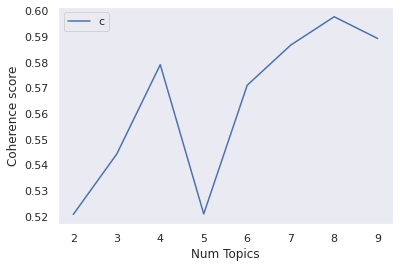

In [ ]:
# Show graph
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5208
Num Topics = 3  has Coherence Value of 0.5443
Num Topics = 4  has Coherence Value of 0.5791
Num Topics = 5  has Coherence Value of 0.521
Num Topics = 6  has Coherence Value of 0.5711
Num Topics = 7  has Coherence Value of 0.5867
Num Topics = 8  has Coherence Value of 0.5977
Num Topics = 9  has Coherence Value of 0.5892


In [ ]:
# Select the model and print the topics
opt_model = model_list[6]
model_topic = opt_model.show_topics(formatted=False)
opt_model.print_topics(num_words=10)

[(0,
  '0.046*"step" + 0.035*"track" + 0.034*"run" + 0.019*"walk" + 0.019*"show" + 0.017*"activity" + 0.016*"point" + 0.015*"day" + 0.015*"distance" + 0.015*"time"'),
 (1,
  '0.026*"account" + 0.020*"data" + 0.020*"say" + 0.019*"even" + 0.018*"try" + 0.017*"log" + 0.017*"error" + 0.016*"email" + 0.016*"sign" + 0.014*"login"'),
 (2,
  '0.036*"work" + 0.029*"sync" + 0.028*"update" + 0.021*"time" + 0.019*"phone" + 0.017*"issue" + 0.016*"fix" + 0.014*"use" + 0.014*"try" + 0.011*"problem"'),
 (3,
  '0.080*"workout" + 0.062*"good" + 0.033*"love" + 0.029*"plan" + 0.028*"use" + 0.024*"best" + 0.017*"great" + 0.016*"exercise" + 0.014*"really" + 0.011*"one"'),
 (4,
  '0.032*"health" + 0.032*"watch" + 0.022*"samsung" + 0.020*"data" + 0.015*"connect" + 0.015*"would" + 0.014*"sync" + 0.014*"fitness" + 0.013*"need" + 0.012*"like"'),
 (5,
  '0.048*"great" + 0.028*"sleep" + 0.027*"track" + 0.024*"like" + 0.024*"keep" + 0.019*"help" + 0.016*"fitness" + 0.014*"well" + 0.014*"use" + 0.013*"good"'),
 (6,


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis2 = gensimvis.prepare(opt_model, corpus, id2word)
vis2


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.146368 -0.088979       1        1  26.350027
0      0.079026 -0.137902       2        1  15.295650
6     -0.114869 -0.056665       3        1  15.272985
7      0.069662 -0.057240       4        1  10.998972
3     -0.166447 -0.077713       5        1   9.822292
5     -0.185637  0.017673       6        1   9.616669
4     -0.110354  0.258244       7        1   6.927517
1      0.282251  0.142583       8        1   5.715887, topic_info=        Term          Freq         Total Category  logprob  loglift
57   workout  13110.000000  13110.000000  Default  30.0000  30.0000
271     food   9793.000000   9793.000000  Default  29.0000  29.0000
4       good  16637.000000  16637.000000  Default  28.0000  28.0000
13   calorie   9585.000000   9585.000000  Default  27.0000  27.0000
33      sync  14245.000000  14245.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
101     keep    717.023194  11337.490553   Topic8  -4.8869   0.1012
31      step    635.655411  14358.604834   Topic8  -5.0073  -0.2555
35       use    652.027370  27874.382550   Topic8  -4.9819  -0.8935
905   access    454.881069   1145.393811   Topic8  -5.3420   1.9385
11      able    473.719507   4141.741406   Topic8  -5.3014   0.6937

[595 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
2221      8  0.997869   aap
11        1  0.292148  able
11        2  0.037907  able
11        3  0.301081  able
11        4  0.070985  able
...     ...       ...   ...
350       1  0.113604  zero
350       2  0.849561  zero
350       4  0.030871  zero
350       6  0.001235  zero
350       8  0.004939  zero

[1507 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 7, 8, 4, 6, 5, 2])

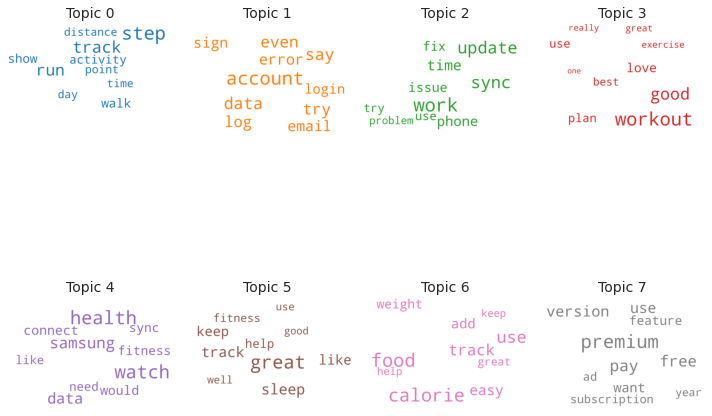

In [ ]:
#plot a word cloud of the topics

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=1800,
                  height=1200,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = opt_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 4, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=200)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=14))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

#### To find out the features of each apps associated with positive and negative ratings

In [ ]:
#create a function to retrieve the bigrams and trigrams in each each review
def make_the_ngrams(texts, n):
    return list(zip(*[texts[doc:] for doc in range (n)]))


In [ ]:
clean_reviews1['bigrams']= clean_reviews1['reviewsl_sp_nstp_lemm'].map(lambda x: make_the_ngrams(list(nltk.word_tokenize(x)),2)) #tokenise each word, make the ngrams in sets of 2 in a list
clean_reviews1['trigrams']= clean_reviews1['reviewsl_sp_nstp_lemm'].map(lambda x: make_the_ngrams(list(nltk.word_tokenize(x)),3)) #tokenise each word, make the ngrams in sets of 2 in a list

In [ ]:
clean_reviews1[['trigrams','bigrams']]

,trigrams,bigrams
0,"[(pretty, good, much), (good, much, useful), (...","[(pretty, good), (good, much), (much, useful),..."
1,"[(arabic, language, support), (language, suppo...","[(arabic, language), (language, support), (sup..."
2,[],[]
3,"[(use, work, great), (work, great, recently), ...","[(use, work), (work, great), (great, recently)..."
4,"[(enjoy, motivation, give), (motivation, give,...","[(enjoy, motivation), (motivation, give), (giv..."
...,...,...
114681,"[(love, track, sync)]","[(love, track), (track, sync)]"
114682,"[(update, break, bluetooth), (break, bluetooth...","[(update, break), (break, bluetooth), (bluetoo..."
114683,"[(excellent, informative, work), (informative,...","[(excellent, informative), (informative, work)..."
114684,"[(create, account, keep), (account, keep, say)...","[(create, account), (account, keep), (keep, sa..."


In [ ]:
positive_bigrams = clean_reviews1[clean_reviews1['Sentiment Rating']==1]
negative_bigrams = clean_reviews1[clean_reviews1['Sentiment Rating']==0]

In [ ]:
clean_reviews1.columns

Index(['reviews', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at',
       'replyContent', 'repliedAt', 'appId', 'year', 'month', 'day', 'appIDno',
       'appIDname', 'reviewsl', 'reviewsl_sp', 'reviewsl_sp_nstp',
       'reviewsl_sp_nstp_pt', 'reviews1_sp_nstp_ptm', 'reviewsl_sp_nstp_lemm',
       'spacy_reviews', 'finalspacy_reviews', 'Sentiment Rating', 'bigrams',
       'trigrams'],
      dtype='object')

In [ ]:
#positive bigrams by app
fitbitpositive_bigrams = clean_reviews1[(clean_reviews1['Sentiment Rating']==1)& (clean_reviews1['appId']== 'com.fitbit.FitbitMobile')]
googlepositive_bigrams = clean_reviews1[(clean_reviews1['Sentiment Rating']==1)& (clean_reviews1['appId']== 'com.google.android.apps.fitness')]
fitnesspalpositive_bigrams = clean_reviews1[(clean_reviews1['Sentiment Rating']==1)& (clean_reviews1['appId']== 'com.myfitnesspal.android')]
nikepositive_bigrams = clean_reviews1[(clean_reviews1['Sentiment Rating']==1)& (clean_reviews1['appId']== 'com.nike.ntc')]
runtasticpositive_bigrams = clean_reviews1[(clean_reviews1['Sentiment Rating']==1)& (clean_reviews1['appId']== 'com.runtastic.android')]

In [ ]:
#negative bigrams by app
fitbitnegative_bigrams = clean_reviews1[(clean_reviews1['Sentiment Rating']==0)& (clean_reviews1['appId']== 'com.fitbit.FitbitMobile')]
googlenegative_bigrams = clean_reviews1[(clean_reviews1['Sentiment Rating']==0)& (clean_reviews1['appId']== 'com.google.android.apps.fitness')]
fitnesspalnegative_bigrams = clean_reviews1[(clean_reviews1['Sentiment Rating']==0)& (clean_reviews1['appId']== 'com.myfitnesspal.android')]
nikenegative_bigrams = clean_reviews1[(clean_reviews1['Sentiment Rating']==0)& (clean_reviews1['appId']== 'com.nike.ntc')]
runtasticnegative_bigrams = clean_reviews1[(clean_reviews1['Sentiment Rating']== 0)& (clean_reviews1['appId']== 'com.runtastic.android')]

In [ ]:
# function to extract the top phrases
def  top_phrases(phrases):
    lphrase = phrases.tolist()
    connect_bigrams =list(chain(*lphrase))
    phrase_counts= Counter(connect_bigrams)
    return phrase_counts.most_common(10)
                                                    


In [ ]:
fitbittopphrases_pos = top_phrases(fitbitpositive_bigrams['bigrams'])


fitbittopphrases_neg = top_phrases(fitbitnegative_bigrams['bigrams'])
print('fitbit posititve phrases: ',fitbittopphrases_pos)

print('fitbit negative phrases: ', fitbittopphrases_neg )

fitbit posititve phrases:  [(('easy', 'use'), 718), (('heart', 'rate'), 648), (('keep', 'track'), 635), (('work', 'well'), 341), (('track', 'step'), 269), (('track', 'sleep'), 265), (('help', 'keep'), 251), (('work', 'great'), 244), (('sleep', 'pattern'), 234), (('charge', '3'), 233)]
fitbit negative phrases:  [(('versa', '2'), 564), (('charge', '3'), 460), (('last', 'update'), 449), (('restart', 'phone'), 431), (('sync', 'issue'), 400), (('heart', 'rate'), 390), (('work', 'fine'), 330), (('uninstall', 'reinstall'), 311), (('customer', 'service'), 311), (('late', 'update'), 310)]


In [ ]:
df_fitbit_pos_phrase = pd.DataFrame(fitbittopphrases_pos, columns= {'features':0, 'occurence': 1}).style.set_table_attributes("style='display:inline; margin-right:50px;'").set_caption("Positive Features of Fitbit")
df_fitbit_neg_phrase = pd.DataFrame(fitbittopphrases_neg, columns= {'features':0, 'occurence': 1}).style.set_table_attributes("style='display:inline'").set_caption("Negative Features of Fitbit")


display_html(df_fitbit_pos_phrase._repr_html_() + df_fitbit_neg_phrase._repr_html_(), raw=True)

,features,occurence
0,"('easy', 'use')",718
1,"('heart', 'rate')",648
2,"('keep', 'track')",635
3,"('work', 'well')",341
4,"('track', 'step')",269
5,"('track', 'sleep')",265
6,"('help', 'keep')",251
7,"('work', 'great')",244
8,"('sleep', 'pattern')",234
9,"('charge', '3')",233


https://www.skytowner.com/explore/displaying_dataframes_side_by_side_in_pandas

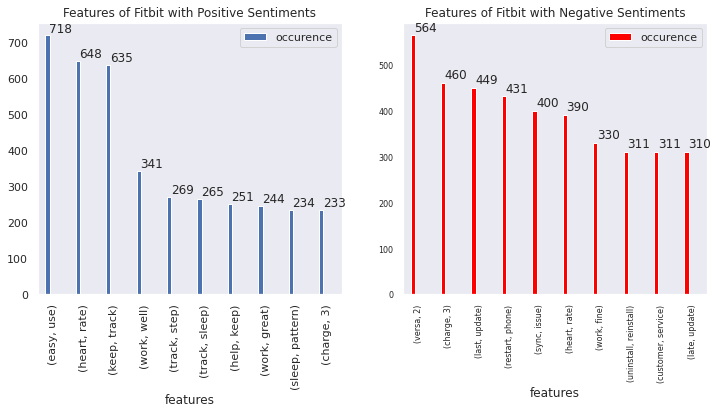

In [ ]:
fig , ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2) 

n = pd.DataFrame(fitbittopphrases_pos, columns= {'features':0, 'occurence': 1})
pp = n.plot(ax =ax1, kind = 'bar',  x= 'features', y = 'occurence', figsize = (12,5))
for i in pp.patches:

  c=i.get_width()
  diff = c-0.36
  i.set_width(diff)
  x= i.get_x()+i.get_width()-0.02
  y= i.get_height()+ 10
  count= '{:,.0f}'.format(i.get_height())
  pp.annotate(count,(x,y))
pp.set_title("Features of Fitbit with Positive Sentiments", fontsize=12,fontweight = 30)
#sns.despine(bottom=True, left=True)


m = pd.DataFrame(fitbittopphrases_neg, columns= {'features':0, 'occurence': 1})
nn = m.plot(ax= ax2, kind ='bar', x= 'features', y = 'occurence', figsize=(12, 5), color='red',fontsize=8)
for i in nn.patches:

  c=i.get_width()
  diff = c-0.36
  i.set_width(diff)
  x= i.get_x()+i.get_width()-0.02
  y= i.get_height()+ 10
  count= '{:,.0f}'.format(i.get_height())
  nn.annotate(count,(x,y))
nn.set_title("Features of Fitbit with Negative Sentiments", fontsize=12,fontweight = 30)
#.despine(bottom=True, left=True)
plt.show()

In [ ]:
googletopphrases_pos = top_phrases(googlepositive_bigrams['bigrams'])


googletopphrases_neg = top_phrases(googlenegative_bigrams['bigrams'])
print('google posititve phrases: ',googletopphrases_pos)

print('google negative phrases: ', googletopphrases_neg )

google posititve phrases:  [(('heart', 'point'), 582), (('heart', 'rate'), 347), (('keep', 'track'), 275), (('easy', 'use'), 266), (('track', 'step'), 250), (('step', 'count'), 207), (('count', 'step'), 199), (('track', 'activity'), 179), (('work', 'well'), 167), (('5', 'star'), 158)]
google negative phrases:  [(('heart', 'point'), 1598), (('track', 'step'), 858), (('step', 'count'), 712), (('count', 'step'), 650), (('heart', 'rate'), 460), (('track', 'activity'), 456), (('move', 'minute'), 429), (('stop', 'track'), 398), (('samsung', 'health'), 325), (('stop', 'work'), 310)]


In [ ]:
df_google_pos_phrase = pd.DataFrame(googletopphrases_pos, columns= {'features':0, 'occurence': 1}).style.set_table_attributes("style='display:inline; margin-right:50px;'").set_caption("Positive Features of Google")
df_google_neg_phrase = pd.DataFrame(googletopphrases_neg, columns= {'features':0, 'occurence': 1}).style.set_table_attributes("style='display:inline'").set_caption("Negative Features of Google")


display_html(df_google_pos_phrase._repr_html_() + df_google_neg_phrase._repr_html_(), raw=True)

,features,occurence
0,"('heart', 'point')",582
1,"('heart', 'rate')",347
2,"('keep', 'track')",275
3,"('easy', 'use')",266
4,"('track', 'step')",250
5,"('step', 'count')",207
6,"('count', 'step')",199
7,"('track', 'activity')",179
8,"('work', 'well')",167
9,"('5', 'star')",158


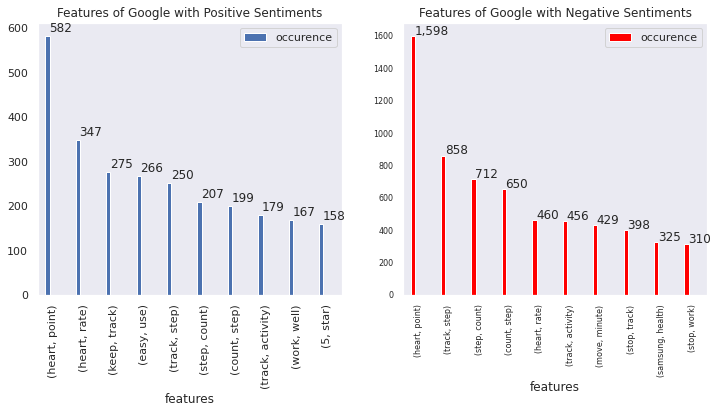

In [ ]:
fig , ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2) 

gp = pd.DataFrame(googletopphrases_pos, columns= {'features':0, 'occurence': 1})
ggp = gp.plot(ax =ax1, kind = 'bar',  x= 'features', y = 'occurence', figsize = (12,5))
for i in ggp.patches:

  c=i.get_width()
  diff = c-0.36
  i.set_width(diff)
  x= i.get_x()+i.get_width()-0.02
  y= i.get_height()+ 10
  count= '{:,.0f}'.format(i.get_height())
  ggp.annotate(count,(x,y))
ggp.set_title("Features of Google with Positive Sentiments", fontsize=12,fontweight = 30)
#sns.despine(bottom=True, left=True)


gn = pd.DataFrame(googletopphrases_neg, columns= {'features':0, 'occurence': 1})
ggn = gn.plot(ax= ax2, kind ='bar', x= 'features', y = 'occurence', figsize=(12, 5), color='red',fontsize=8)
for i in ggn.patches:

  c=i.get_width()
  diff = c-0.36
  i.set_width(diff)
  x= i.get_x()+i.get_width()-0.02
  y= i.get_height()+ 10
  count= '{:,.0f}'.format(i.get_height())
  ggn.annotate(count,(x,y))
ggn.set_title("Features of Google with Negative Sentiments", fontsize=12,fontweight = 30)
#.despine(bottom=True, left=True)
plt.show()

In [ ]:
fitnesspaltopphrases_pos = top_phrases(fitnesspalpositive_bigrams['bigrams'])


fitnesspaltopphrases_neg = top_phrases(fitnesspalnegative_bigrams['bigrams'])
print('fitnesspal posititve phrases: ',fitnesspaltopphrases_pos)

print('fitnesspal negative phrases: ', fitnesspaltopphrases_neg )

fitnesspal posititve phrases:  [(('easy', 'use'), 1450), (('keep', 'track'), 1100), (('track', 'calorie'), 867), (('free', 'version'), 575), (('lose', 'weight'), 548), (('track', 'food'), 490), (('weight', 'loss'), 449), (('bar', 'code'), 386), (('calorie', 'count'), 345), (('help', 'keep'), 337)]
fitnesspal negative phrases:  [(('samsung', 'health'), 712), (('cancel', 'subscription'), 512), (('every', 'time'), 393), (('add', 'food'), 328), (('use', 'year'), 265), (('log', 'food'), 255), (('use', 'love'), 243), (('free', 'trial'), 233), (('free', 'version'), 221), (('track', 'calorie'), 219)]


In [ ]:
df_fpal_pos_phrase = pd.DataFrame(fitnesspaltopphrases_pos, columns= {'features':0, 'occurence': 1}).style.set_table_attributes("style='display:inline; margin-right:50px;'").set_caption("Positive Features of FitnessPal")
df_fpal_neg_phrase = pd.DataFrame(fitnesspaltopphrases_neg, columns= {'features':0, 'occurence': 1}).style.set_table_attributes("style='display:inline'").set_caption("Negative Features of FitnessPal")


display_html(df_fpal_pos_phrase._repr_html_() + df_fpal_neg_phrase._repr_html_(), raw=True)

,features,occurence
0,"('easy', 'use')",1450
1,"('keep', 'track')",1100
2,"('track', 'calorie')",867
3,"('free', 'version')",575
4,"('lose', 'weight')",548
5,"('track', 'food')",490
6,"('weight', 'loss')",449
7,"('bar', 'code')",386
8,"('calorie', 'count')",345
9,"('help', 'keep')",337


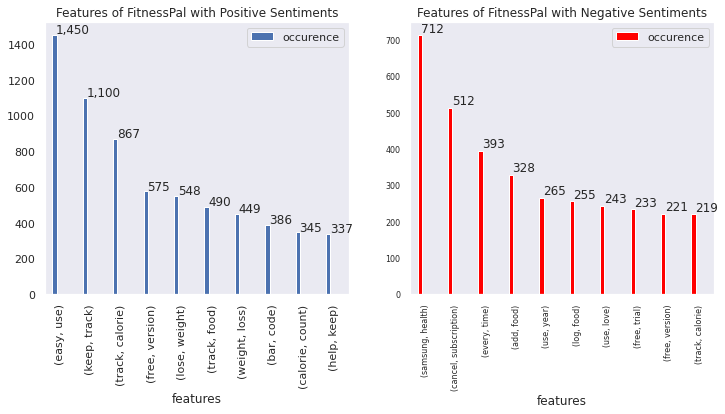

In [ ]:
fig , ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2) 

fp = pd.DataFrame(fitnesspaltopphrases_pos, columns= {'features':0, 'occurence': 1})
fpp = fp.plot(ax =ax1, kind = 'bar',  x= 'features', y = 'occurence', figsize = (12,5))
for i in fpp.patches:

  c=i.get_width()
  diff = c-0.36
  i.set_width(diff)
  x= i.get_x()+i.get_width()-0.02
  y= i.get_height()+ 10
  count= '{:,.0f}'.format(i.get_height())
  fpp.annotate(count,(x,y))
fpp.set_title("Features of FitnessPal with Positive Sentiments", fontsize=12,fontweight = 30)
#sns.despine(bottom=True, left=True)


fn = pd.DataFrame(fitnesspaltopphrases_neg, columns= {'features':0, 'occurence': 1})
fpn = fn.plot(ax= ax2, kind ='bar', x= 'features', y = 'occurence', figsize=(12, 5), color='red',fontsize=8)
for i in fpn.patches:

  c=i.get_width()
  diff = c-0.36
  i.set_width(diff)
  x= i.get_x()+i.get_width()-0.02
  y= i.get_height()+ 10
  count= '{:,.0f}'.format(i.get_height())
  fpn.annotate(count,(x,y))
fpn.set_title("Features of FitnessPal with Negative Sentiments", fontsize=12,fontweight = 30)
#.despine(bottom=True, left=True)
plt.show()

In [ ]:
niketopphrases_pos = top_phrases(nikepositive_bigrams['bigrams'])


niketopphrases_neg = top_phrases(nikenegative_bigrams['bigrams'])
print('nike posititve phrases: ',niketopphrases_pos)

print('nike negative phrases: ', niketopphrases_neg )

nike posititve phrases:  [(('great', 'workout'), 359), (('easy', 'use'), 345), (('workout', 'plan'), 283), (('good', 'workout'), 186), (('best', 'workout'), 179), (('really', 'good'), 173), (('variety', 'workout'), 163), (('5', 'star'), 155), (('best', 'fitness'), 144), (('really', 'like'), 137)]
nike negative phrases:  [(('new', 'update'), 361), (('bring', 'back'), 338), (('download', 'workout'), 301), (('workout', 'plan'), 251), (('late', 'update'), 225), (('every', 'time'), 224), (('last', 'update'), 206), (('old', 'version'), 204), (('5', 'star'), 171), (('use', 'love'), 158)]


In [ ]:
df_nik_pos_phrase = pd.DataFrame(niketopphrases_pos, columns= {'features':0, 'occurence': 1}).style.set_table_attributes("style='display:inline; margin-right:50px;'").set_caption("Positive Features of Nike")
df_nik_neg_phrase = pd.DataFrame(niketopphrases_neg, columns= {'features':0, 'occurence': 1}).style.set_table_attributes("style='display:inline'").set_caption("Negative Features of Nike")


display_html(df_nik_pos_phrase._repr_html_() + df_nik_neg_phrase._repr_html_(), raw=True)

,features,occurence
0,"('great', 'workout')",359
1,"('easy', 'use')",345
2,"('workout', 'plan')",283
3,"('good', 'workout')",186
4,"('best', 'workout')",179
5,"('really', 'good')",173
6,"('variety', 'workout')",163
7,"('5', 'star')",155
8,"('best', 'fitness')",144
9,"('really', 'like')",137


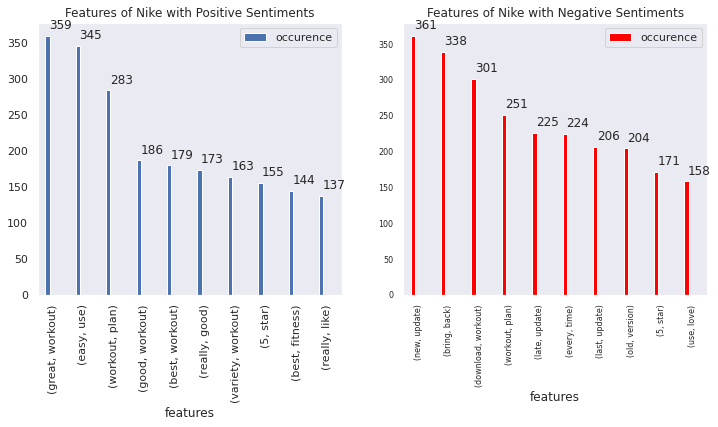

In [ ]:
fig , ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2) 

nip = pd.DataFrame(niketopphrases_pos, columns= {'features':0, 'occurence': 1})
nipp = nip.plot(ax =ax1, kind = 'bar',  x= 'features', y = 'occurence', figsize = (12,5))
for i in nipp.patches:

  c=i.get_width()
  diff = c-0.36
  i.set_width(diff)
  x= i.get_x()+i.get_width()-0.02
  y= i.get_height()+ 10
  count= '{:,.0f}'.format(i.get_height())
  nipp.annotate(count,(x,y))
nipp.set_title("Features of Nike with Positive Sentiments", fontsize=12,fontweight = 30)
#sns.despine(bottom=True, left=True)


nin = pd.DataFrame(niketopphrases_neg, columns= {'features':0, 'occurence': 1})
ninp = nin.plot(ax= ax2, kind ='bar', x= 'features', y = 'occurence', figsize=(12, 5), color='red',fontsize=8)
for i in ninp.patches:

  c=i.get_width()
  diff = c-0.36
  i.set_width(diff)
  x= i.get_x()+i.get_width()-0.02
  y= i.get_height()+ 10
  count= '{:,.0f}'.format(i.get_height())
  ninp.annotate(count,(x,y))
ninp.set_title("Features of Nike with Negative Sentiments", fontsize=12,fontweight = 30)
#.despine(bottom=True, left=True)
plt.show()

In [ ]:
runtastictopphrases_pos = top_phrases(runtasticpositive_bigrams['bigrams'])


runtastictopphrases_neg = top_phrases(runtasticnegative_bigrams['bigrams'])
print('runtastic posititve phrases: ',runtastictopphrases_pos)

print('runtastic negative phrases: ', runtastictopphrases_neg )

runtastic posititve phrases:  [(('easy', 'use'), 507), (('track', 'run'), 220), (('keep', 'track'), 205), (('free', 'version'), 154), (('track', 'progress'), 146), (('user', 'friendly'), 136), (('gps', 'signal'), 119), (('great', 'track'), 117), (('calorie', 'burn'), 116), (('work', 'well'), 112)]
runtastic negative phrases:  [(('gps', 'signal'), 470), (('pro', 'version'), 242), (('track', 'run'), 192), (('heart', 'rate'), 181), (('every', 'time'), 176), (('gps', 'work'), 175), (('free', 'version'), 169), (('lose', 'gps'), 159), (('gps', 'track'), 152), (('stop', 'work'), 132)]


In [ ]:
df_runs_pos_phrase = pd.DataFrame(runtastictopphrases_pos, columns= {'features':0, 'occurence': 1}).style.set_table_attributes("style='display:inline; margin-right:50px;'").set_caption("Positive Features of Runtastic")
df_runs_neg_phrase = pd.DataFrame(runtastictopphrases_neg, columns= {'features':0, 'occurence': 1}).style.set_table_attributes("style='display:inline'").set_caption("Negative Features of Runtastic")


display_html(df_runs_pos_phrase._repr_html_() + df_runs_neg_phrase._repr_html_(), raw=True)

,features,occurence
0,"('easy', 'use')",507
1,"('track', 'run')",220
2,"('keep', 'track')",205
3,"('free', 'version')",154
4,"('track', 'progress')",146
5,"('user', 'friendly')",136
6,"('gps', 'signal')",119
7,"('great', 'track')",117
8,"('calorie', 'burn')",116
9,"('work', 'well')",112


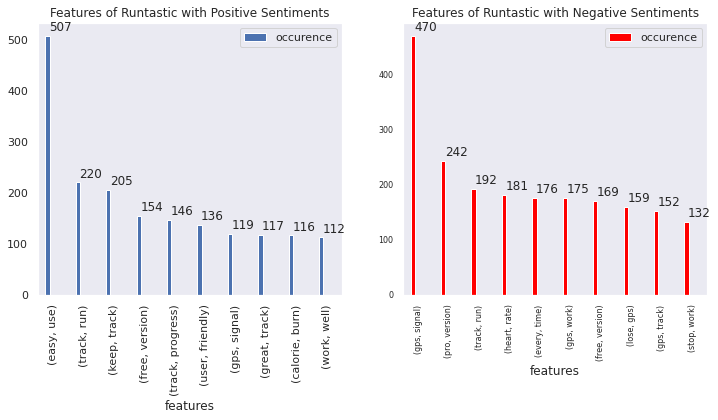

In [ ]:
fig , ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2) 

rup = pd.DataFrame(runtastictopphrases_pos, columns= {'features':0, 'occurence': 1})
rupp = rup.plot(ax =ax1, kind = 'bar',  x= 'features', y = 'occurence', figsize = (12,5))
for i in rupp.patches:

  c=i.get_width()
  diff = c-0.36
  i.set_width(diff)
  x= i.get_x()+i.get_width()-0.02
  y= i.get_height()+ 10
  count= '{:,.0f}'.format(i.get_height())
  rupp.annotate(count,(x,y))
rupp.set_title("Features of Runtastic with Positive Sentiments", fontsize=12,fontweight = 30)
#sns.despine(bottom=True, left=True)


run = pd.DataFrame(runtastictopphrases_neg, columns= {'features':0, 'occurence': 1})
runn = run.plot(ax= ax2, kind ='bar', x= 'features', y = 'occurence', figsize=(12, 5), color='red',fontsize=8)
for i in runn.patches:

  c=i.get_width()
  diff = c-0.36
  i.set_width(diff)
  x= i.get_x()+i.get_width()-0.02
  y= i.get_height()+ 10
  count= '{:,.0f}'.format(i.get_height())
  runn.annotate(count,(x,y))
runn.set_title("Features of Runtastic with Negative Sentiments", fontsize=12,fontweight = 30)
#.despine(bottom=True, left=True)
plt.show()

In [ ]:
clean_reviews1['Sentiment Rating'].value_counts() #checkng for class imbalance

1    59996
0    54690
Name: Sentiment Rating, dtype: int64

### Visualisation of Yearly Overall rating since 2019

In [ ]:
overall_rating = clean_reviews1[clean_reviews1['year']>2018] #filter ratings from 2019

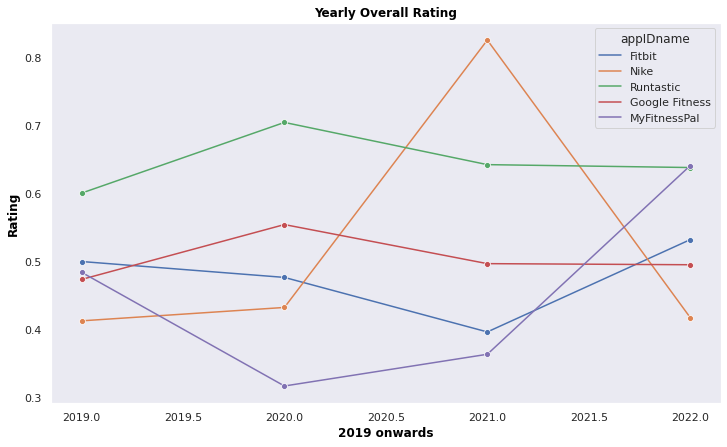

In [ ]:
plt.figure(figsize= (12,7))
sns.lineplot(data =overall_rating, x ='year', y= 'Sentiment Rating', hue = 'appIDname',ci = None, marker = 'o' )
plt.title("Yearly Overall Rating", fontdict = font)
plt.ylabel('Rating', fontdict = font)
plt.xlabel('2019 onwards', fontdict = font)
plt.show()

# MACHINE LEARNING MODEL 
### (we will initially compare the base models for NLTK and SPACY pre-processed reviews)

In [ ]:
spacydframe = clean_reviews1[clean_reviews1['finalspacy_reviews'].map(lambda d: len (d))>0] # removing rows with empty spacy processed reviews
len(spacydframe)

114581

In [50]:
nltkdframe = clean_reviews1[clean_reviews1['reviewsl_sp_nstp_lemm'].map(lambda d: len (d))>0] # removing empty reviews after text preprocessing with nltk
len(nltkdframe)

114137

### Term Frequency-Inverse Document Frequency (TF-IDF ) model is applied for Text Featurization

#### Apply tfidf to our reveiews pre-processed using spacy

In [ ]:
# python object of the class CountVectorizer for spacy transformed document
tf_spacy = TfidfVectorizer(ngram_range=(1,4)) # number of n-grams

tf_spacy_reviews = tf_spacy.fit_transform(spacydframe['finalspacy_reviews'])

In [ ]:
tf_spacy_reviews

<114581x2211727 sparse matrix of type '<class 'numpy.float64'>'
	with 5605771 stored elements in Compressed Sparse Row format>

In [ ]:
#using text preprocessed with spacy
X_train_sp, X_test_sp, y_train_sp, y_test_sp = train_test_split(tf_spacy_reviews,
                                                                            spacydframe['Sentiment Rating'],
                                                                            test_size = 0.2,
                                                                            random_state = 0)

#### Apply  Multinomial Naive Bayes Classifier to reviews preprocessed using  Spacy as our base model

In [ ]:
%%time
NB_spacy = MultinomialNB().fit(X_train_sp,y_train_sp) # build and train the model using spacy lemmatized

# Predict the results
NB_spacy_pred = NB_spacy.predict(X_test_sp)

# Evaluate the model
print("F1 score of Multinomial Naive Bayes model using spacy processed data: ",f1_score(y_test_sp, NB_spacy_pred))
print("Accuracy of Multinomial Naive Bayes model using spacy processed data:", metrics.accuracy_score(y_test_sp,NB_spacy_pred))

F1 score of Multinomial Naive Bayes model using spacy processed data:  0.9075164235133522
Accuracy of Multinomial Naive Bayes model using spacy processed data: 0.9053977396692412
CPU times: user 210 ms, sys: 15 ms, total: 225 ms
Wall time: 222 ms


In [ ]:
report_NBspacy = classification_report(y_test_sp, NB_spacy_pred)
print(report_NBspacy)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90     11039
           1       0.92      0.90      0.91     11878

    accuracy                           0.91     22917
   macro avg       0.91      0.91      0.91     22917
weighted avg       0.91      0.91      0.91     22917



#### Apply tfidf for our reveiews pre-processed using NLTK

In [ ]:
# python object of the class CountVectorizer for nltk transformed document
tf_nltk = TfidfVectorizer(tokenizer= word_tokenize, ngram_range=(1,4))
tf_nltk_reviews = tf_nltk.fit_transform(nltkdframe['reviewsl_sp_nstp_lemm'])

In [ ]:
tf_nltk_reviews

<114137x2453473 sparse matrix of type '<class 'numpy.float64'>'
	with 6098267 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_nltk, X_test_nltk, y_train_nltk, y_test_nltk = train_test_split(tf_nltk_reviews,
                                                                            nltkdframe['Sentiment Rating'],
                                                                            test_size = 0.2,
                                                                            random_state = 0)

#### Apply  Multinomial Naive Bayes Classifier to reviews preprocessed using  NLTK as our base model

In [ ]:
%%time
NB_NLTK = MultinomialNB().fit(X_train_nltk,y_train_nltk) # build and train the model using spacy lemmatized

# Predict the results
NB_NLTK_pred = NB_NLTK.predict(X_test_nltk)

# Evaluate the model
print("F1 score of Multinomial Naive Bayes model using NLTK processed data: ",f1_score(y_test_nltk, NB_NLTK_pred))
print("Accuracy of Multinomial Naive Bayes model using NLTK processed data:", metrics.accuracy_score(y_test_nltk,NB_NLTK_pred))

F1 score of Multinomial Naive Bayes model using NLTK processed data:  0.9100191448627952
Accuracy of Multinomial Naive Bayes model using NLTK processed data: 0.9073506220431049
CPU times: user 296 ms, sys: 31.2 ms, total: 327 ms
Wall time: 325 ms


In [ ]:
report_NBnltk = classification_report(y_test_nltk, NB_NLTK_pred)
print(report_NBnltk)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     10817
           1       0.93      0.89      0.91     12011

    accuracy                           0.91     22828
   macro avg       0.91      0.91      0.91     22828
weighted avg       0.91      0.91      0.91     22828



###### our nltk processed reviews performs slighlty better than the spacy processed review so we choose to continue with the nltk processed review

In [ ]:
# we extract the data we want to use for hyper-parameter tunning. Only 2% of the data will be used due to compute cost
x_train, x_notused, y_train, y_notused = train_test_split(tf_nltk_reviews, nltkdframe['Sentiment Rating'], test_size = 0.90, random_state = 42)                                                                            

### Apply Decision Tree Classifier to reviews preprocessed using  NLTK

In [ ]:
%%time
DT_model = DecisionTreeClassifier(criterion = 'gini')

DT_model.fit(X_train_nltk,y_train_nltk)
DT_pred = DT_model.predict(X_test_nltk)

CPU times: user 12min 55s, sys: 508 ms, total: 12min 56s
Wall time: 12min 52s


In [ ]:
#evaluate model
report_DTmodel = classification_report(y_test_nltk, DT_pred)
print(report_DTmodel)

              precision    recall  f1-score   support

           0       0.87      0.88      0.88     10817
           1       0.89      0.88      0.89     12011

    accuracy                           0.88     22828
   macro avg       0.88      0.88      0.88     22828
weighted avg       0.88      0.88      0.88     22828



### Apply Logistic Regression Classifier to reviews preprocessed using  NLTK

In [ ]:
# Create the model class
%%time
LR_model = LogisticRegression()

# Train the model 
LR_model.fit(X_train_nltk,y_train_nltk)

# Predict the results
LR_pred = LR_model.predict(X_test_nltk)

CPU times: user 1min 59s, sys: 10min 29s, total: 12min 29s
Wall time: 31.3 s


In [ ]:
#evaluate model
report_LRmodel = classification_report(y_test_nltk, LR_pred)
print(report_LRmodel)

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     10817
           1       0.92      0.87      0.90     12011

    accuracy                           0.90     22828
   macro avg       0.90      0.90      0.90     22828
weighted avg       0.90      0.90      0.90     22828



### Apply Support Vector Classifier to reviews preprocessed using  NLTK

In [ ]:
%%time
SVC_model = SVC(kernel = 'linear', random_state= 0)

# Train the model 
SVC_model.fit(X_train_nltk,y_train_nltk)

# Predict the results
SVC_pred = SVC_model.predict(X_test_nltk)

CPU times: user 1h 46min 34s, sys: 6.14 s, total: 1h 46min 40s
Wall time: 1h 46min 8s


In [ ]:
#evaluate model
report_SVCmodel = classification_report(y_test_nltk, SVC_pred)
print(report_SVCmodel)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92     10817
           1       0.94      0.91      0.93     12011

    accuracy                           0.92     22828
   macro avg       0.92      0.92      0.92     22828
weighted avg       0.92      0.92      0.92     22828



### Apply Random Forest Classifier to reviews preprocessed using  NLTK

In [ ]:
%%time
RF_model = RandomForestClassifier(criterion='gini', random_state = 0, n_estimators = 5)

# Train the model 
RF_model.fit(X_train_nltk,y_train_nltk)

# Predict the results
RF_pred = RF_model.predict(X_test_nltk)

CPU times: user 11min 24s, sys: 483 ms, total: 11min 24s
Wall time: 11min 21s


In [ ]:
#evaluate model


report_RFmodel = classification_report(y_test_nltk, RF_pred)
print(report_RFmodel)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87     10817
           1       0.90      0.86      0.88     12011

    accuracy                           0.88     22828
   macro avg       0.88      0.88      0.88     22828
weighted avg       0.88      0.88      0.88     22828



#### LSTM model
##### https://www.analyticsvidhya.com/blog/2021/06/natural-language-processing-sentiment-analysis-using-lstm/

In [ ]:
# Extract coulumns to use 
df_LSTM = clean_reviews1[['reviews','Sentiment Rating']] 

In [ ]:
def prepareLSTM(data, stop_words):

  df_LSTM['reviews'] = df_LSTM['reviews'].apply(lambda x:' '.join(x.lower() for x in x.split()))

    # Replacing the special characters

  df_LSTM['reviews'] = df_LSTM['reviews'].str.replace('[^ws]', '')


  df_LSTM['reviews'] = df_LSTM['reviews'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop_words))

    # Lemmatization

  df_LSTM['reviews'] = df_LSTM['reviews'].apply(lambda x: ' '.join([Word(x).lemmatize() for x in x.split()]))
  
  lb=LabelEncoder()
  df_LSTM['Sentiment Rating'] = lb.fit_transform(df_LSTM['Sentiment Rating'])

  return df_LSTM

stop_words = stopwords.words('english')

LSTM_data = prepareLSTM(df_LSTM, stop_words)


In [ ]:
tokenizer = Tokenizer(num_words=500, split=' ') # Words to keep and the denominator for seperating the words
tokenizer.fit_on_texts(LSTM_data['reviews'].values)
X = tokenizer.texts_to_sequences(LSTM_data['reviews'].values) #converts the tokens into sequences of integers
X = pad_sequences(X) # pads each sequence that is short

In [ ]:
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1])) #converts the sequence into a fixed length dense vector that is more representative in smaller dimensions
model.add(SpatialDropout1D(0.4)) #promotes independence between features
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 120)            60000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 1, 120)           0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 176)               209088    
                                                                 
 dense (Dense)               (None, 1)                 177       
                                                                 
Total params: 269,265
Trainable params: 269,265
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,LSTM_data['Sentiment Rating'], shuffle = True, test_size=0.20, random_state = 42)

In [ ]:
%%time
history  = model.fit(X_train, y_train,epochs = 5, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/5
2868/2868 [==============================] - 21s 6ms/step - loss: 0.6843 - accuracy: 0.5427 - val_loss: 0.6858 - val_accuracy: 0.5436
Epoch 2/5
2868/2868 [==============================] - 17s 6ms/step - loss: 0.6815 - accuracy: 0.5523 - val_loss: 0.6861 - val_accuracy: 0.5440
Epoch 3/5
2868/2868 [==============================] - 17s 6ms/step - loss: 0.6804 - accuracy: 0.5540 - val_loss: 0.6864 - val_accuracy: 0.5260
Epoch 4/5
2868/2868 [==============================] - 17s 6ms/step - loss: 0.6800 - accuracy: 0.5544 - val_loss: 0.6869 - val_accuracy: 0.5429
Epoch 5/5
2868/2868 [==============================] - 18s 6ms/step - loss: 0.6798 - accuracy: 0.5543 - val_loss: 0.6861 - val_accuracy: 0.5425
CPU times: user 7min 48s, sys: 2min 3s, total: 9min 51s
Wall time: 1min 28s


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 5
epochs_range = range(epochs)

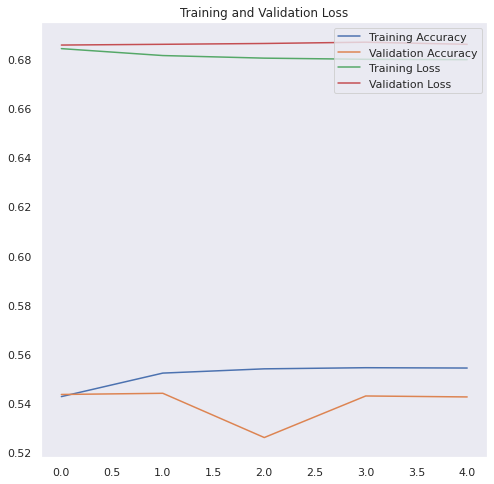

In [ ]:
%matplotlib inline
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("initial_model.pdf", dpi=100)
plt.show()

In [ ]:
# hyperparameter tunning of LSTM model

In [ ]:
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1], trainable = True)) #converts the sequence into a fixed length dense vector that is more representative in smaller dimensions
model.add(SpatialDropout1D(0.2)) #promotes independence between features
model.add(LSTM(500, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 1, 120)            60000     
                                                                 
 spatial_dropout1d_5 (Spatia  (None, 1, 120)           0         
 lDropout1D)                                                     
                                                                 
 lstm_8 (LSTM)               (None, 500)               1242000   
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 1,302,501
Trainable params: 1,302,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
%%time
history  = model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/50
2868/2868 [==============================] - 42s 13ms/step - loss: 0.6841 - accuracy: 0.5444 - val_loss: 0.6863 - val_accuracy: 0.5425
Epoch 2/50
2868/2868 [==============================] - 38s 13ms/step - loss: 0.6813 - accuracy: 0.5517 - val_loss: 0.6858 - val_accuracy: 0.5419
Epoch 3/50
2868/2868 [==============================] - 38s 13ms/step - loss: 0.6805 - accuracy: 0.5542 - val_loss: 0.6865 - val_accuracy: 0.5431
Epoch 4/50
2868/2868 [==============================] - 38s 13ms/step - loss: 0.6800 - accuracy: 0.5536 - val_loss: 0.6859 - val_accuracy: 0.5435
Epoch 5/50
2868/2868 [==============================] - 39s 14ms/step - loss: 0.6798 - accuracy: 0.5548 - val_loss: 0.6885 - val_accuracy: 0.5432
Epoch 6/50
2868/2868 [==============================] - 39s 14ms/step - loss: 0.6795 - accuracy: 0.5551 - val_loss: 0.6865 - val_accuracy: 0.5428
Epoch 7/50
2868/2868 [==============================] - 39s 14ms/step - loss: 0.6794 - accuracy: 0.5559 - val_loss: 0.6883 -

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 50
epochs_range = range(epochs)

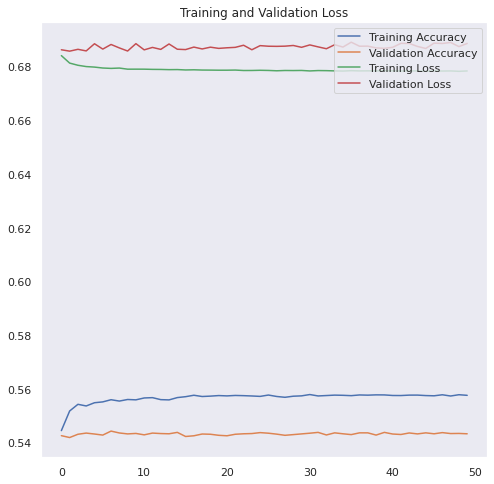

In [ ]:
%matplotlib inline
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("initial_model.pdf", dpi=100)
plt.show()

In [ ]:
prediction_test = model.predict(X_test)
prediction_test = np.rint(prediction_test)
prediction_test

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [ ]:
report_LSTMmodel = classification_report(y_test,prediction_test)
print(report_LSTMmodel)

              precision    recall  f1-score   support

           0       0.52      0.68      0.59     11065
           1       0.58      0.42      0.49     11873

    accuracy                           0.54     22938
   macro avg       0.55      0.55      0.54     22938
weighted avg       0.55      0.54      0.54     22938



In [ ]:
model = Sequential() #trying another architecture

model.add(Embedding(500, 120, input_length = X.shape[1], trainable = True))
model.add(LSTM(500, dropout = 0.1, return_sequences = True))
model.add(LSTM(500, dropout = 0.2))
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.1))
model.add (Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics = 'accuracy')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1, 120)            60000     
                                                                 
 lstm_1 (LSTM)               (None, 1, 500)            1242000   
                                                                 
 lstm_2 (LSTM)               (None, 500)               2002000   
                                                                 
 dense_1 (Dense)             (None, 10)                5010      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3,309,021
Trainable params: 3,309,021
No

In [ ]:
%%time
history  = model.fit(X_train, y_train,epochs = 50, batch_size = 256, validation_data = (X_test, y_test))

Epoch 1/50
359/359 [==============================] - 18s 38ms/step - loss: 0.6874 - accuracy: 0.5356 - val_loss: 0.6861 - val_accuracy: 0.5373
Epoch 2/50
359/359 [==============================] - 13s 35ms/step - loss: 0.6831 - accuracy: 0.5506 - val_loss: 0.6857 - val_accuracy: 0.5414
Epoch 3/50
359/359 [==============================] - 13s 35ms/step - loss: 0.6823 - accuracy: 0.5545 - val_loss: 0.6858 - val_accuracy: 0.5426
Epoch 4/50
359/359 [==============================] - 13s 37ms/step - loss: 0.6821 - accuracy: 0.5564 - val_loss: 0.6857 - val_accuracy: 0.5439
Epoch 5/50
359/359 [==============================] - 13s 36ms/step - loss: 0.6817 - accuracy: 0.5569 - val_loss: 0.6863 - val_accuracy: 0.5436
Epoch 6/50
359/359 [==============================] - 13s 36ms/step - loss: 0.6814 - accuracy: 0.5569 - val_loss: 0.6858 - val_accuracy: 0.5437
Epoch 7/50
359/359 [==============================] - 13s 36ms/step - loss: 0.6807 - accuracy: 0.5559 - val_loss: 0.6858 - val_accuracy:

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 50
epochs_range = range(epochs)

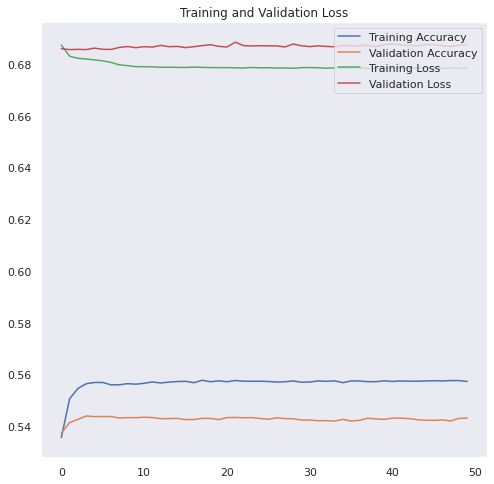

In [ ]:
%matplotlib inline
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("initial_model.pdf", dpi=100)
plt.show()

In [ ]:
prediction_test = model.predict(X_test)
prediction_test = np.rint(prediction_test)
prediction_test

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [ ]:
report_LSTMmodel = classification_report(y_test,prediction_test)
print(report_LSTMmodel)

              precision    recall  f1-score   support

           0       0.52      0.67      0.59     11065
           1       0.58      0.42      0.49     11873

    accuracy                           0.54     22938
   macro avg       0.55      0.55      0.54     22938
weighted avg       0.55      0.54      0.54     22938



### Hyper-parameter tuning of the Machine Learning Models 

---



In [ ]:
#Decision Tree Classifier
%%time
DT_model = DecisionTreeClassifier(criterion = 'gini') # Decision Tree Hyper-parameter tunning
param_grid = {'max_features': [None, int],
'min_samples_split': [2, 5, 6],
'min_samples_leaf':[1,5,10]}


# Implement RandomizedSearchCV
TunnedDT = RandomizedSearchCV(DT_model, param_grid, cv=3) # For 3 Cross-Validation

TunnedDT.fit(X_train_nltk,y_train_nltk) # Model Fitting

print("\n Best Score is ")

print(TunnedDT.best_score_)

print("\n Best Estimator is ")
print(TunnedDT.best_estimator_)

print("\n Best Parametes are")
print(TunnedDT.best_params_)


 Best Score is 
0.8491605524513908

 Best Estimator is 
DecisionTreeClassifier(min_samples_split=5)

 Best Parametes are
{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None}
CPU times: user 1h 55min 4s, sys: 0 ns, total: 1h 55min 4s
Wall time: 1h 54min 46s


In [ ]:
%%time
FinalDT_model = DecisionTreeClassifier(criterion = 'gini',min_samples_split= 5, min_samples_leaf = 1, max_features =None)

FinalDT_model.fit(X_train_nltk,y_train_nltk)
FinalDT_pred = FinalDT_model.predict(X_test_nltk)

CPU times: user 17min 14s, sys: 0 ns, total: 17min 14s
Wall time: 17min 11s


In [ ]:
#evaluate model
report_FinalDT = classification_report(y_test_nltk, FinalDT_pred)
print(report_FinalDT)

              precision    recall  f1-score   support

           0       0.87      0.88      0.88     10910
           1       0.89      0.88      0.89     11918

    accuracy                           0.88     22828
   macro avg       0.88      0.88      0.88     22828
weighted avg       0.88      0.88      0.88     22828



In [ ]:
# Logistic Regression Hyper-parameter tunning
%%time
lr_model = LogisticRegression()
solvers = ['lbfgs', 'liblinear']
penalty = ['l2', 'l1','none']
c_values = [10, 1.0, 100]
# define random search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
lrrandom_search = RandomizedSearchCV(estimator=lr_model, param_distributions =grid, n_jobs= 3, cv=cv, scoring='accuracy',error_score=0)
lr_random_result = lrrandom_search.fit(X_train_nltk,y_train_nltk)
# summarize results
print("Best: %f using %s" % (lr_random_result.best_score_, lr_random_result.best_params_))


Best: 0.922406 using {'solver': 'liblinear', 'penalty': 'l2', 'C': 100}
CPU times: user 2min 59s, sys: 17min 1s, total: 20min
Wall time: 29min 7s


In [ ]:
# Create the model class
%%time
FinalLR_model = LogisticRegression(solver= 'liblinear', penalty= 'l2', C= 100)

# Train the model 
FinalLR_model.fit(X_train_nltk,y_train_nltk)

# Predict the results
FinalLR_pred = FinalLR_model.predict(X_test_nltk)

CPU times: user 3min 13s, sys: 15min 52s, total: 19min 6s
Wall time: 29.8 s


In [ ]:
#evaluate model

report_FinalLR = classification_report(y_test_nltk, FinalLR_pred)
print(report_FinalLR)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92     10910
           1       0.94      0.92      0.93     11918

    accuracy                           0.93     22828
   macro avg       0.93      0.93      0.93     22828
weighted avg       0.93      0.93      0.93     22828



In [ ]:
# SVC hyperparameter tunning
%%time
SVC_model = LinearSVC()
max_iter = [1000, 1500]
C = [1,2]
penalty = ['l1', 'l2']
# define random search
grid = dict(C=C, penalty = penalty, max_iter = max_iter)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
Tunned_SVC = RandomizedSearchCV(estimator=SVC_model, param_distributions =grid, n_jobs=3, cv=cv, scoring='accuracy',error_score=0)
SVC_result = Tunned_SVC.fit(X_train_nltk,y_train_nltk)
# summarize results
print("Best: %f using %s" % (SVC_result.best_score_, SVC_result.best_params_)) # the output shows that the default parameters of linear SVC model performs best

Best: 0.924557 using {'penalty': 'l2', 'max_iter': 1000, 'C': 1}
CPU times: user 7.34 s, sys: 1.47 s, total: 8.81 s
Wall time: 3min 20s


In [ ]:
%%time
FinalSVC_model = LinearSVC() # as the best parameters are the default parameters (refer sklearn library)

# Train the model 
FinalSVC_model.fit(X_train_nltk,y_train_nltk)

# Predict the results
FinalSVC_pred = FinalSVC_model.predict(X_test_nltk)

CPU times: user 3.7 s, sys: 61.7 ms, total: 3.76 s
Wall time: 3.74 s


In [ ]:
#evaluate model

report_FinalSVC = classification_report(y_test_nltk, FinalSVC_pred)
print(report_FinalSVC)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     10860
           1       0.94      0.93      0.93     11968

    accuracy                           0.93     22828
   macro avg       0.93      0.93      0.93     22828
weighted avg       0.93      0.93      0.93     22828



In [ ]:
# RANDOM FOREST HYPERPARAMETER TUNING

In [ ]:
model = RandomForestClassifier()
n_estimators = [5, 10, 8]
max_features = ['sqrt', 'log2']
criterion = ['gini']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features, criterion = criterion)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
TunnedRF_search = RandomizedSearchCV(estimator=model, param_distributions=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
RF_result = TunnedRF_search.fit(X_train_nltk,y_train_nltk)
# summarize results
print("Best: %f using %s" % (RF_result.best_score_, RF_result.best_params_))

Best: 0.884422 using {'n_estimators': 10, 'max_features': 'sqrt', 'criterion': 'gini'}


In [ ]:
%%time
FinalRF_model = RandomForestClassifier(criterion='gini', random_state = 0, n_estimators = 10,max_features= 'sqrt')

# Train the model 
FinalRF_model.fit(X_train_nltk,y_train_nltk)

# Predict the results
FinalRF_pred = FinalRF_model.predict(X_test_nltk)

CPU times: user 23min 9s, sys: 0 ns, total: 23min 9s
Wall time: 23min 5s


In [ ]:
#evaluate model

report_FinalRF = classification_report(y_test_nltk, FinalRF_pred)
print(report_FinalRF)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     10910
           1       0.93      0.85      0.89     11918

    accuracy                           0.89     22828
   macro avg       0.89      0.89      0.89     22828
weighted avg       0.89      0.89      0.89     22828



### SENTIMENT ANALYSIS USING TEXTBLOB

In [51]:
nltkdframe['R_Sentiment/Polarity'] = nltkdframe['reviewsl_sp_nstp_lemm'].apply(str) #convert to lower strings

In [52]:
%%time
nltkdframe['sentiment_polarity'] = nltkdframe['R_Sentiment/Polarity'].apply(lambda x: TextBlob(x).sentiment.polarity) #the polarity is the sentiment
nltkdframe['sentiment_subjectivity'] = nltkdframe['R_Sentiment/Polarity'].apply(lambda x: TextBlob(x).sentiment.subjectivity) 

CPU times: user 55.7 s, sys: 283 ms, total: 56 s
Wall time: 55.7 s


In [53]:
#plot the polarity and subjectivity as shown on geekculture

def get_nalysis(score):
    if score <0:
        return 0

    else:
        return 1
nltkdframe['TextBlobAnalysis'] = nltkdframe['sentiment_polarity'].apply(get_nalysis)

In [54]:
report_textblobmodel = classification_report(nltkdframe['Sentiment Rating'], nltkdframe['TextBlobAnalysis'])
print(report_textblobmodel)

              precision    recall  f1-score   support

           0       0.86      0.30      0.45     54557
           1       0.60      0.96      0.74     59580

    accuracy                           0.64    114137
   macro avg       0.73      0.63      0.59    114137
weighted avg       0.73      0.64      0.60    114137



In [ ]:
#will not tune the hyperparameters for multinomial Naive Bayes as it generalizes well  (Yiu,2019)

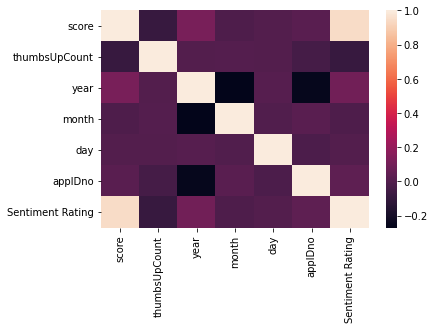

In [59]:
corr2 = clean_reviews1.corr()
sns.heatmap(corr2)

#### REFERENCES

Python Examples(2021) *Pandas DataFrame – Replace Values in Column based on Condition.* Available Online: https://pythonexamples.org/pandas-dataframe-replace-values-in-column-based-on-condition/ [Accessed 29/11/2021]

Python Tutorials For Digital Humanities (2021) * How to Create Bigrams and Trigrams and Remove Frequent Words (Topic Modeling for DH 03.04)*  Available Online: https://www.youtube.com/watch?v=UEn3xHNBXJU&list=PLg0pLhAjywMqmntqMLD7PS2TyU6yav2jB&index=37&t=901s [Accessed 16/06/2022]

PyOhio (2018) *Natural Language Processing in Python* Available Online: https://www.youtube.com/watch?v=xvqsFTUsOmc&t=4888s [Accessed 18/07/2022]

Rithesh Sreenivasan (2020) *LDA Topic Modelling Explained with implementation using gensim in Python.* Available Online : https://www.youtube.com/watch?v=nNvPvvuPnGs [Accessed 18/07/2022]

Venelin Valkov (2020) * Create Custom Dataset | Sentiment Analysis with BERT using huggingface, PyTorch and Python Tutorial.* Available Online: https://www.youtube.com/watch?v=-CAC4wK9Ey0&t=19s [Accessed 01/03/2022]

DPhi (2020) *Introduction to NLP with Sentiment Analysis using real dataset!* Available Online [05/05/2022] 
